In [5]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier




from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

import warnings

# Suppress specific FutureWarnings from seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


**Data features descriptions:**
> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> * **Destination** - The planet the passenger will be debarking to.
> * **Age** - The age of the passenger.
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> * **Name** - The first and last names of the passenger.
> * **Transported** - Whether the passenger was transported to another dimension. This is the **target**, the column you are trying to predict.

# Loading Datasets

In [7]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

In [8]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Basic Understanding of Data

**Observation**
* We can observe that in our testing dataset we don't have **Transported** feature but in training data we have that feature.
* So, we have to build model using training data and have to do prediction for our testing data.

In [10]:
### Making the copy of original data
titanic_train_origial=titanic_train.copy()
titanic_test_origial=titanic_test.copy()

### Checking Shape of Training & Testing Datasets

In [11]:
print('Traning dataset shape is:', titanic_train.shape)
print('Testing dataset shape is:', titanic_test.shape)

Traning dataset shape is: (8693, 14)
Testing dataset shape is: (4277, 13)


### Checking Duplicates Data

In [12]:
print(f"Duplicates in train dataset are: {titanic_train.duplicated().sum()},({100*titanic_train.duplicated().sum()/len(titanic_train)})%")
print(f"Duplicates in test dataset are: {titanic_test.duplicated().sum()},({100*titanic_test.duplicated().sum()/len(titanic_test)})%")

Duplicates in train dataset are: 0,(0.0)%
Duplicates in test dataset are: 0,(0.0)%


**Observation**
* We can observe that we don't have any duplicates values in our both training & testing datasets.
* So we dont have any type of **Data Lekage** in our DataSea.

### Checking Information of Training & Testing Data

In [13]:
print('Information of training data:')
print(titanic_train.info())
print('\n'+'-'*100)
print('Information of testing data:')
print(titanic_test.info())

Information of training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None

----------------------------------------------------------------------------------------------------
Infor

**Observation**
* We can observe that **CryoSleep** & **VIP** features contains boolean values but their data type is **object** so we have to convert their data-type to **bool**.
* We will convert their Data-Types when we will do Data-Preprocessing.

### Checking Total Number & Percentage of Missing values

In [14]:
print('Missing values in Train data')
missing_values_tr = titanic_train.isnull().sum()[titanic_train.isnull().sum()>0].to_frame().rename(columns={0:"Number of missing values"})
missing_values_tr["% of missing values"] = missing_values_tr['Number of missing values']/titanic_train.shape[0]*100
print(missing_values_tr)

print('\n'+'-'*100)
print('Missing values in Test data:')
missing_values_te=titanic_test.isnull().sum()[titanic_test.isnull().sum()>0].to_frame().rename(columns={0:"Number of missing values"})
missing_values_te['% of missing values'] = missing_values_te['Number of missing values']/titanic_test.shape[0]*100
print(missing_values_te)

Missing values in Train data
              Number of missing values  % of missing values
HomePlanet                         201             2.312205
CryoSleep                          217             2.496261
Cabin                              199             2.289198
Destination                        182             2.093639
Age                                179             2.059128
VIP                                203             2.335212
RoomService                        181             2.082135
FoodCourt                          183             2.105142
ShoppingMall                       208             2.392730
Spa                                183             2.105142
VRDeck                             188             2.162660
Name                               200             2.300702

----------------------------------------------------------------------------------------------------
Missing values in Test data:
              Number of missing values  % of missing values


**Observation**
1. We can observe that there is very less % of missing values in both training & testing data.
2. So instead of dropping those missing values we will fill/replace those missing values with best suitable values according to the data.

### Checking cardinality of Categoricall features

In [15]:
print('Cardinality of categorical features in training dataset:')
cardinality_tr=titanic_train.select_dtypes(include='object').nunique()
print(cardinality_tr)
print('\n'+'-'*100)
print('Cardinality of categorical features in testing dataset:')
cardinality_te=titanic_test.select_dtypes(include='object').nunique()
print(cardinality_te)

Cardinality of categorical features in training dataset:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

----------------------------------------------------------------------------------------------------
Cardinality of categorical features in testing dataset:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


**Observation**
* We can observe that **PassengerId** , **Cabin** & **Name** feature of both datasets are having **high cardinality.**
* We normally drop the features having high cardinality but in this project we will do **Feature Engineering** and will create new features from this features.
* Because more amount of data leads to better predictions by model.

In [16]:
cate=titanic_train.select_dtypes(include='object')
for i in cate:
    if i != 'PassengerId' and i != 'Cabin' and i != 'Name':
        print(i,'------',titanic_train[i].unique())
    

HomePlanet ------ ['Europa' 'Earth' 'Mars' nan]
CryoSleep ------ [False True nan]
Destination ------ ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP ------ [False True nan]


# Exploratory Data Analysis (EDA)

### Visulaizing Target Data ("Transported")

In [17]:
v=titanic_train['Transported'].value_counts()
v

Transported
True     4378
False    4315
Name: count, dtype: int64

In [18]:
i=titanic_train['Transported'].value_counts().index
i

Index([True, False], dtype='bool', name='Transported')

In [19]:
titanic_train['Transported'].value_counts(normalize=True)*100

Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x2a7b1adff50>,
 [Text(-0.012522008688130765, 1.0999287246446539, 'True'),
  Text(0.01252200868813063, -1.0999287246446539, 'False')],
 [Text(-0.006830186557162235, 0.5999611225334475, '50.36%'),
  Text(0.006830186557162161, -0.5999611225334475, '49.64%')])

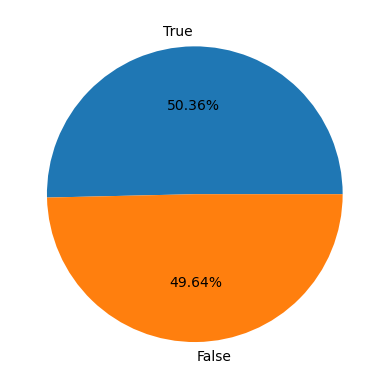

In [20]:
plt.pie(v,labels=i,autopct='%0.2f%%')

**Observation**
* We can observe that our **Transported** Feature is highly balanced.
* So we don't have to use techniques like **under_sampling** or **over_sampling**

### Visualizing "AGE" Feature

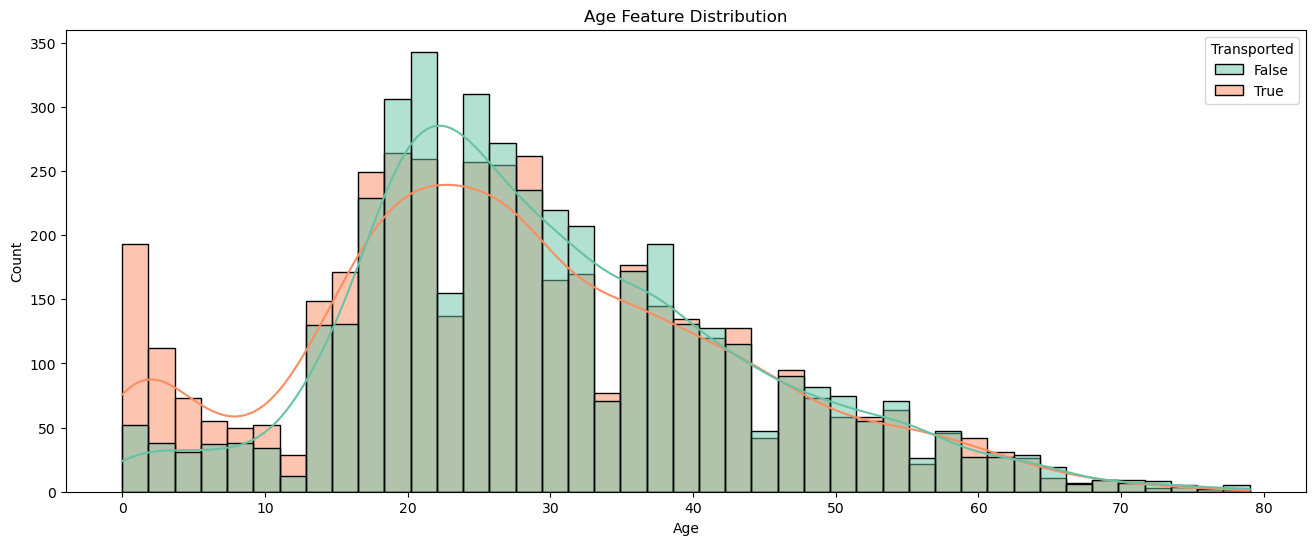

In [21]:
plt.figure(figsize=(16,6))
sns.histplot(x=titanic_train['Age'],hue='Transported',data=titanic_train,kde=True,palette='Set2')
plt.title("Age Feature Distribution");

**Observation**
* Most of the passengers were between age **18-32**.
* Age from **0-18** passengers are **highly transported** when compared with not transported passengers espically for those who were new born.
* Age from **18-32** passengers are **comparatively less transported** when compared to not transported passengers. 
* Age above **32** seems to be **equally transported** when compared to not transported passengers.

**Insights**
* We can create a new feature **Age-Group** from age in which we can split ages into different categories.

### Visualizing All Expenditure Features ("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")

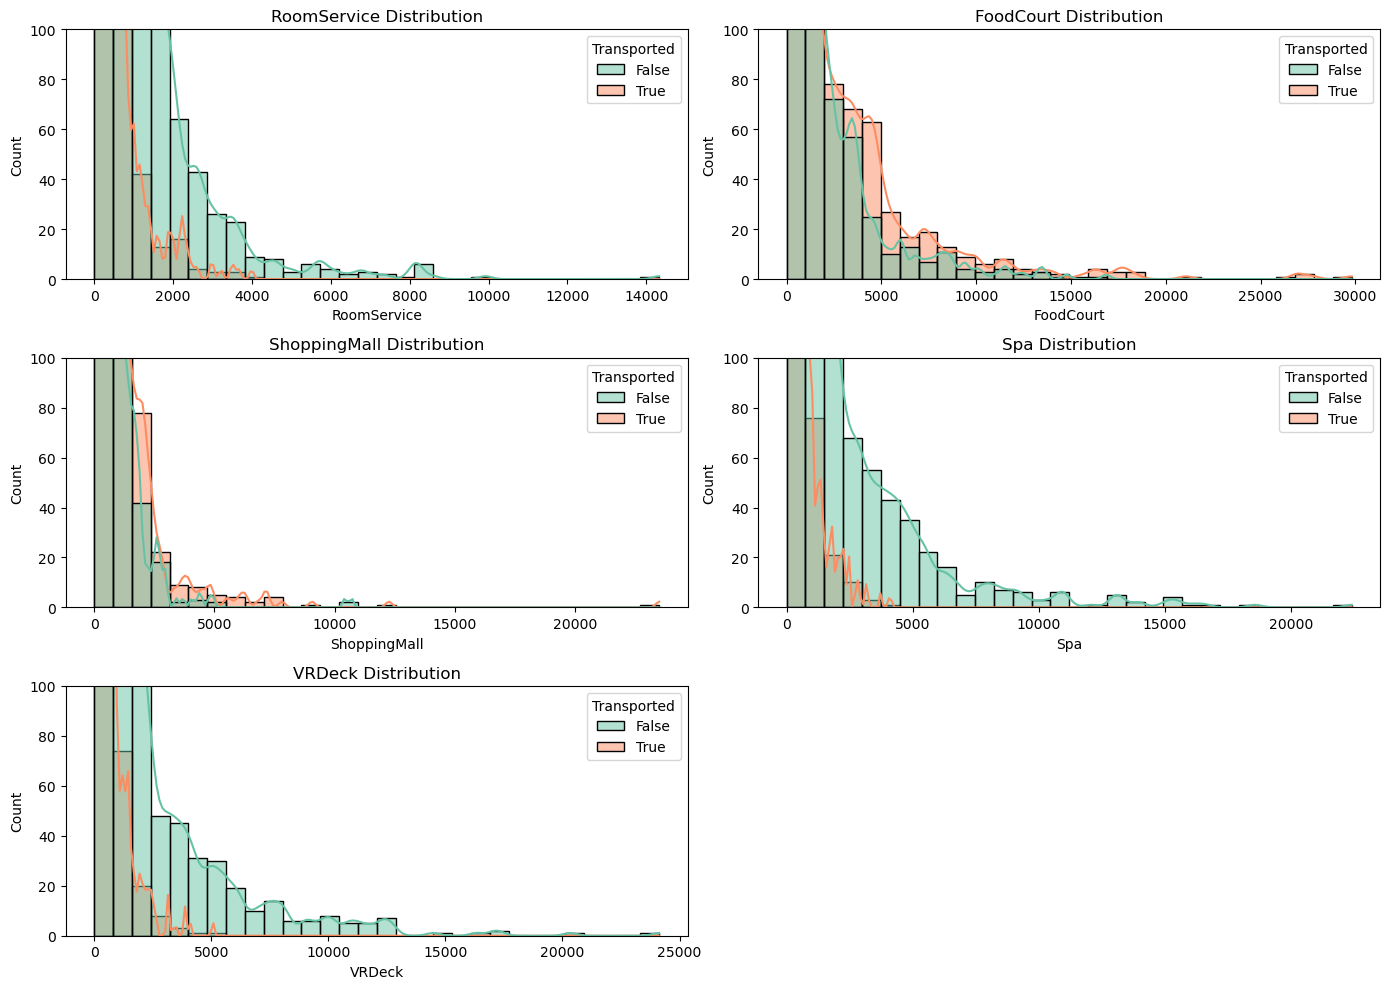

In [22]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column,hue='Transported', data=titanic_train,bins=30,kde=True,palette='Set2')
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()
    

**Observation**
* We can observe that most of the passengers doesn't seems to expend any money.
* Since most of the expenses are **0** so the values with higher expenses are kind of **outliers** in our data.
* We can observe that **RoomService**,**Spa** & **VRDeck** seems to have **similar distributions**.
* We can also observe that **FoodCourt** & **ShoppingMall** are having kind of **similar distributions**.
* All the expenditure features distribution is **Right-Skewed**.
* Passengers having **less expenses are more likely to be transported** than passengers having **high expenses**.

**Insights**
* Since, all expenditure features are having **right-skewed distribution**. So before **Model Building** we will transform these features to **normal distribution** using **log-transformation**

* We can create a new feature **Total Expenditure** indicating the total expenses of all different expenditures done by the passengers.
* Since, most people expense is **0** so we can create a new boolean feature **No Spending** indicating whether the passenger total expense is **0** or not.
* We can split **Total Expenditure** into different categories of expenditure like **Low , Medium & High** Expenses and create one more new feature **Expenditure Category**

### Visualizing Categorical Features ("HomePlanet", "CryoSleep", "Destination", "VIP")

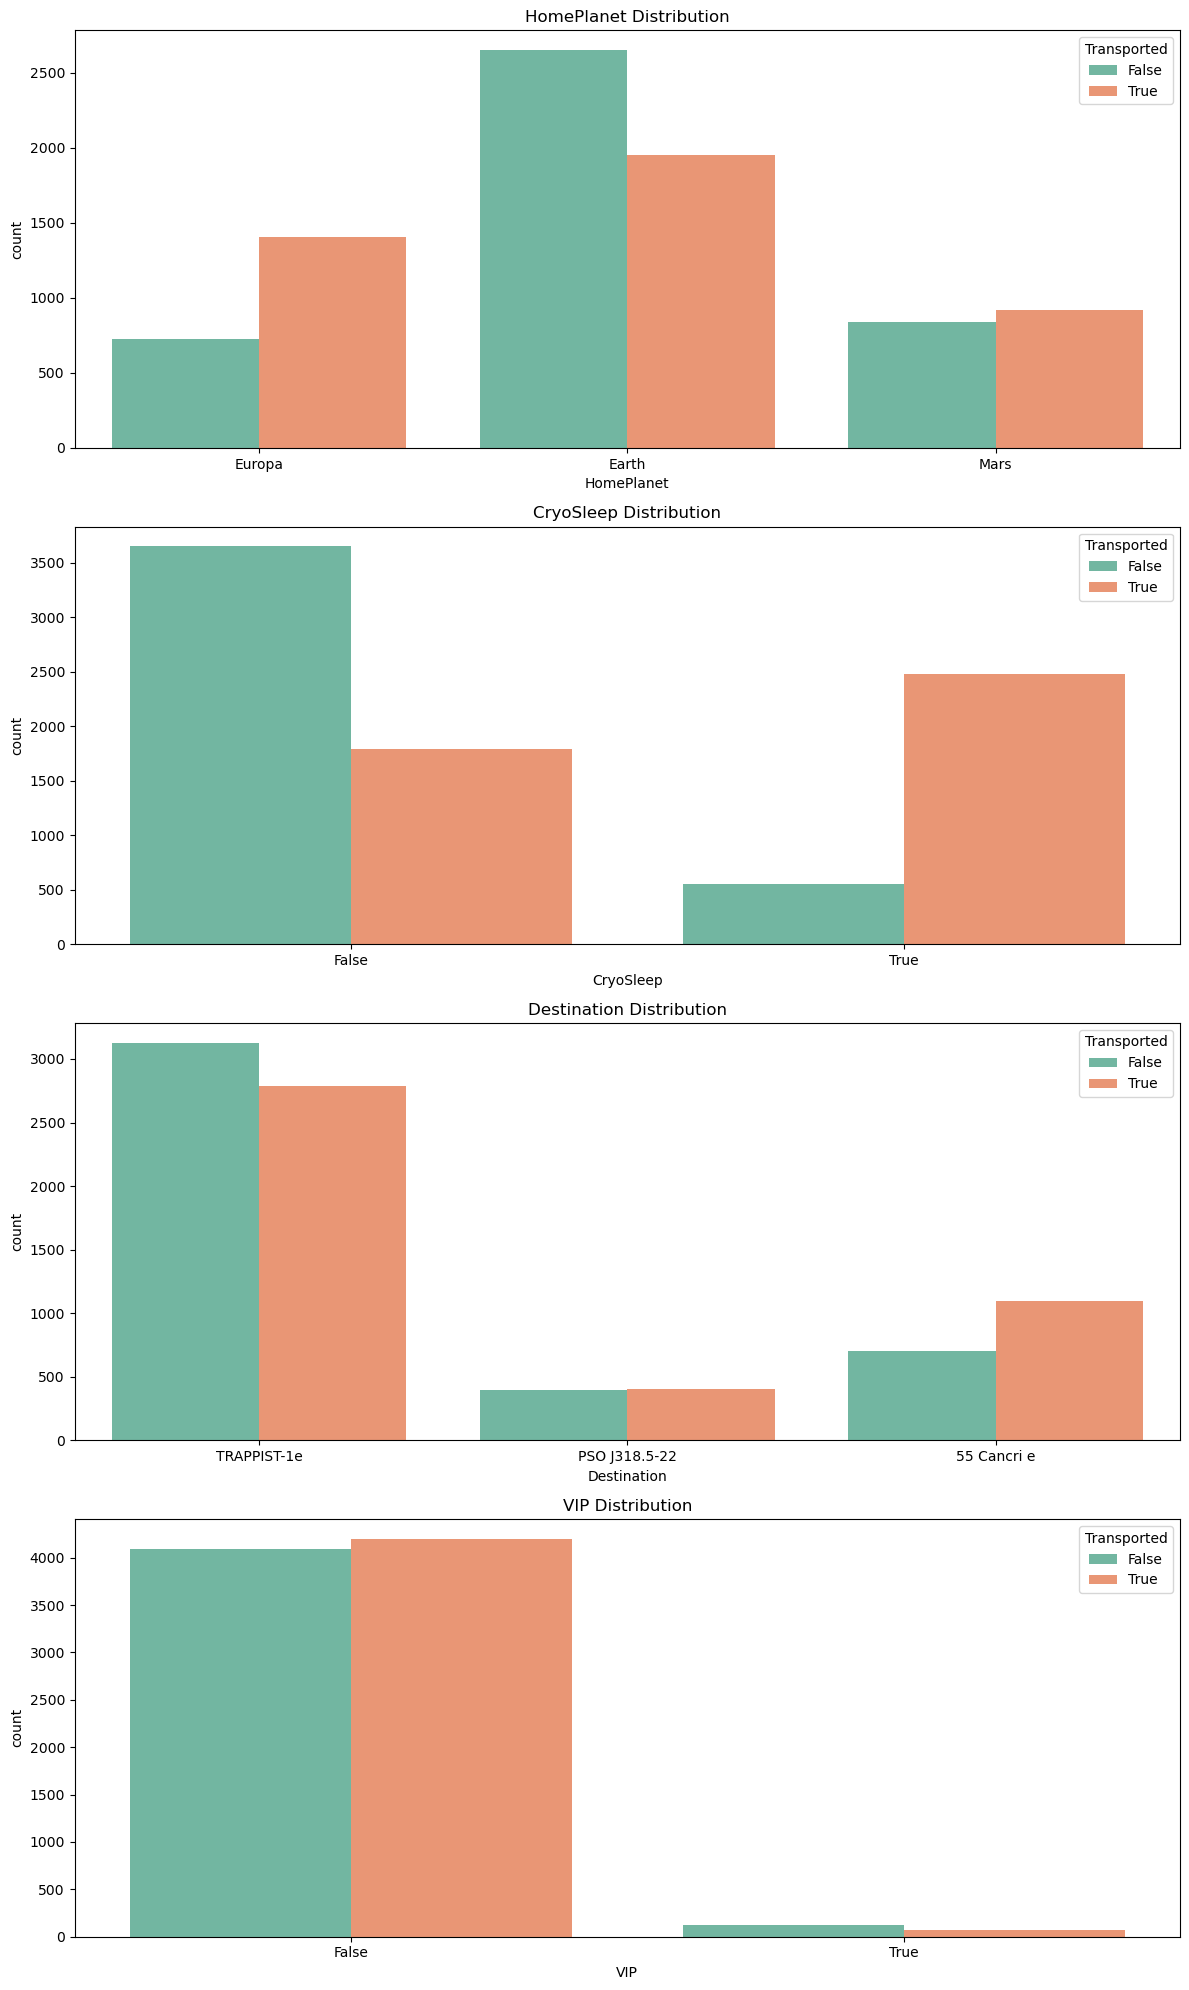

In [23]:
cate_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cate_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue='Transported', data=titanic_train, palette='Set2')
    plt.title(f"{column} Distribution")
    plt.tight_layout()

**Observation**
* In **HomePlanet** feature we can observe that most of passenger are from **Earth** but passenger from **Earth** are **Comparatively Less Transported**, passenger from **Mars** are **Equally Transported**, and passengers from **Europa** are **Highly Transported**.
* In **CryoSleep**  
* In **Destination** feature we can observe that most of the passengers are transported to **Trappist-1e**.
* In **VIP** feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.
* So it's better to drop **VIP** feature before **Model building**.

**NOTE**:- 
* We have visualized all the features expect **PassengerId, Name, Cabin** features. We can't visualize this features because they are having **high cardinality**. We will visualize these features after creating new features from these old features.

# Feature Engineering

### Creating new feature from "PassengerId" Feature

In [24]:
titanic_train['PassengerId'].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


**How will we do feature engineering on PassengerId**

* We know that each Id takes the form **gggg_pp** where **gggg** indicates a group the passenger is travelling with and **pp** is their number of people within the group.

* So we can create a new feature **Group_Size** which will indicate total number of members present in each group.
* We can create one more new feature **Travelling Solo** indicating whether the passenger is travelling solo or in a group.

### Splitting Group and Member values from "PassengerId" column in Train Data.


In [25]:
#titanic_train['Group_Id'] = titanic_train['PassengerId'].str.split('_').str[0]

titanic_train['Group']=titanic_train['PassengerId'].apply(lambda x: x.split("_")[0])
titanic_train['Member']=titanic_train['PassengerId'].apply(lambda x: x.split("_")[1])

In [26]:
#Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
x=titanic_train.groupby(['Group'])['Member'].count()

#Creating a set of group values which are travelling with more than 1 members.
y=set(x[x>1].index) 

### Creating a new feature "Travelling_Solo" which will indicate whether the person is travelling solo or not.


In [27]:
titanic_train['Travelling_Solo']=titanic_train['Group'].apply(lambda x: x not in y)

In [28]:
titanic_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True


### Creating a new feature "Group_size" which will indicate each group number of members.


In [29]:
titanic_train['Group_Size']=0
for i in x.items():
    titanic_train.loc[titanic_train["Group"]==i[0],"Group_Size"]=i[1]

In [30]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


## Now we will do the same for Test data, column "PassengerId" to "Travelling_Solo" and "Group_Size"

In [31]:
#Splitting Group and Member values from "PassengerId" column.

titanic_test['Group']=titanic_test['PassengerId'].apply(lambda x1: x1.split("_")[0])
titanic_test['Member']=titanic_test['PassengerId'].apply(lambda x1: x1.split("_")[1])

In [32]:
#Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
x1=titanic_test.groupby('Group')['Member'].count()

#Creating a set of group values which are travelling with more than 1 members.
y1 = set(x1[x1>1].index)

### Creating a new feature "Travelling_Solo" which will indicate whether the person is travelling solo or not.


In [33]:
titanic_test['Travelling_Solo'] = titanic_test['Group'].apply(lambda x1: x1 not in y1)

In [34]:
#Creating a new feature "Group_size" which will indicate each group number of members.
titanic_test['Group_Size']=0
for i in x1.items():
    titanic_test.loc[titanic_test['Group']==i[0],'Group_Size']=i[1]

In [35]:
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,Travelling_Solo,Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,True,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,True,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,True,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,True,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,True,1


### Visualizing "Group_Size" & "Travelling_Solo" Features.

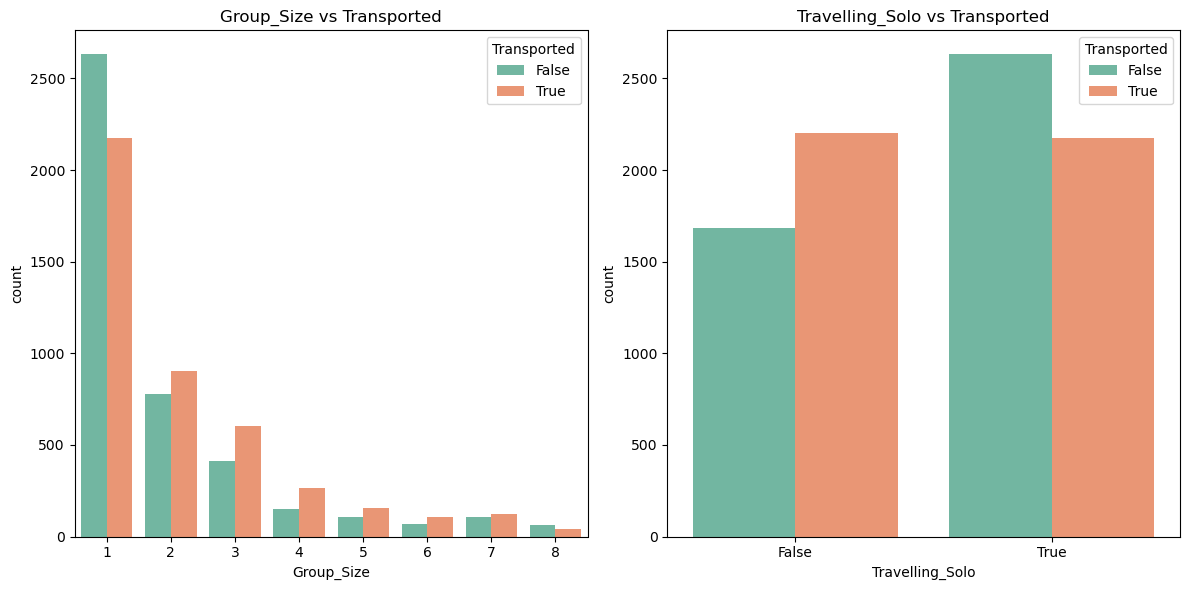

In [36]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x='Group_Size', hue='Transported', data=titanic_train,palette='Set2')
plt.title('Group_Size vs Transported')

plt.subplot(1,2,2)
sns.countplot(x='Travelling_Solo', hue='Transported', data=titanic_train,palette='Set2')
plt.title('Travelling_Solo vs Transported')
plt.tight_layout()
plt.show()

**Observation**
* From **Group_Size** feature we can observe that most the passengers are travelling alone.
* From **Travelling_Solo** feature we can observe that passengers travelling solo are comparatively less transported when compared with passenger travelling in group.

## Creating New Feature using "Cabin" Feature

In [37]:
titanic_train['Cabin'].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


**How will we do feature engineering on Cabin**

* We know that **cabin** feature consists of **deck/num//side** , where **deck** is deck loacation, **num** is deck_number and **side** can be **P** for port or **S** for Starboard.
* We can separate all these 3 values from **cabin** & create three new features **Cabin_Deck** , **Cabin_Number** & **Cabin_Side**.
* We also know that **Cabin** feature is having **NaN** values so to avoid error while splitting we have to replace it in such a way that we can split those **NaN** Values in all three new features respectively.

In [38]:
titanic_train.fillna({'Cabin':'np.nan/np.nan/np.nan'},inplace=True) #In this way we can split NaN values into all three categories

In [39]:
#Split Cabin Column

titanic_train['Cabin_Deck'] = titanic_train['Cabin'].apply(lambda x: x.split('/')[0])
titanic_train['Cabin_Number'] = titanic_train['Cabin'].apply(lambda x: x.split('/')[1])
titanic_train['Cabin_Side'] = titanic_train['Cabin'].apply(lambda x: x.split('/')[2])

In [40]:
#Replacing string nan values to numpy nan values
cols=['Cabin_Deck','Cabin_Number','Cabin_Side']
titanic_train[cols]=titanic_train[cols].replace('np.nan',np.nan)

In [41]:
#Filling missing values in new created features
titanic_train['Cabin_Deck']=titanic_train['Cabin_Deck'].fillna(titanic_train['Cabin_Deck'].mode()[0])
titanic_train['Cabin_Side']=titanic_train['Cabin_Side'].fillna(titanic_train['Cabin_Side'].mode()[0])

#Convert Cabin_Number to Numeric
titanic_train['Cabin_Number'] = pd.to_numeric(titanic_train['Cabin_Number'], errors='coerce')
titanic_train['Cabin_Number']=titanic_train['Cabin_Number'].fillna(titanic_train['Cabin_Number'].median())


In [42]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0001,01,True,1,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,0002,01,True,1,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,0003,01,False,2,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,02,False,2,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,0004,01,True,1,F,1.0,S


### Now we will do the same for Test data colum "Cabin" to "Cabin_Deck", "Cabin_Number", "Cabin_Side"

In [43]:
titanic_test.fillna({'Cabin':'np.nan/np.nan/np.nan'},inplace=True) # In this way we can split NaN values into all three categories

In [44]:
# Split Cabin Column
titanic_test['Cabin_Deck'] = titanic_test['Cabin'].apply(lambda x: x.split('/')[0])
titanic_test['Cabin_Number'] = titanic_test['Cabin'].apply(lambda x: x.split('/')[1])
titanic_test['Cabin_Side'] = titanic_test['Cabin'].apply(lambda x: x.split('/')[2])

In [45]:
# Replacing string nan values into numpy nan values
col=['Cabin_Deck','Cabin_Number','Cabin_Side']
titanic_test[col]=titanic_test[col].replace('np.nan',np.nan)

In [46]:
# Filling missing values in new created columns

titanic_test['Cabin_Deck']=titanic_test['Cabin_Deck'].fillna(titanic_test['Cabin_Deck'].mode()[0])
titanic_test['Cabin_Side']=titanic_test['Cabin_Side'].fillna(titanic_test['Cabin_Side'].mode()[0])

#Convert Cabin_Number to Numeric
titanic_test['Cabin_Number'] = pd.to_numeric(titanic_test['Cabin_Number'],errors='coerce')
titanic_test['Cabin_Number'] = titanic_test['Cabin_Number'].fillna(titanic_test['Cabin_Number'].median())

In [47]:
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,True,1,G,3.0,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,True,1,F,4.0,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,True,1,C,0.0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,True,1,C,1.0,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,True,1,F,5.0,S


## Visualizingg "Cabin_Deck" & "Cabin_Side" feature

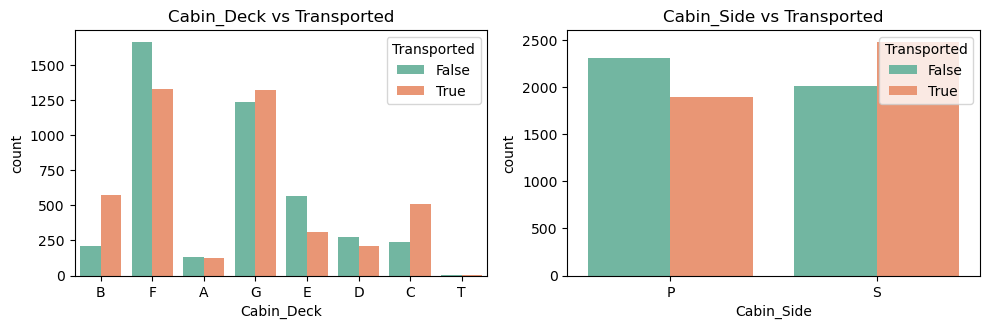

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(x='Cabin_Deck', hue='Transported', data=titanic_train,palette='Set2')
plt.title('Cabin_Deck vs Transported')

plt.subplot(2,2,2)
sns.countplot(x='Cabin_Side', hue='Transported', data=titanic_train,palette='Set2')
plt.title('Cabin_Side vs Transported')
plt.tight_layout()
plt.show()

**Insights**
* From **Cabin_Deck** we can observe that most of the people are from **F & G** Deck.
* There are very few passengers in **Cabin_Deck** ,**T**.
* Passengers from **Cabin Deck** **B & C** are very highly transported.. 
* From **Cabin_Side** we can observe that almost half passengers were from cabin side **S** and half from cabin side **P**.
* But passenger from cabin_side **S** are **Highly Transported** but passengers from cabin_side **P** are **Equally Transported**

### Visualizing "Cabin_Number" Feature.

In [49]:
titanic_train["Cabin_Number"]=titanic_train["Cabin_Number"].astype(int)
titanic_test["Cabin_Number"]=titanic_test["Cabin_Number"].astype(int)

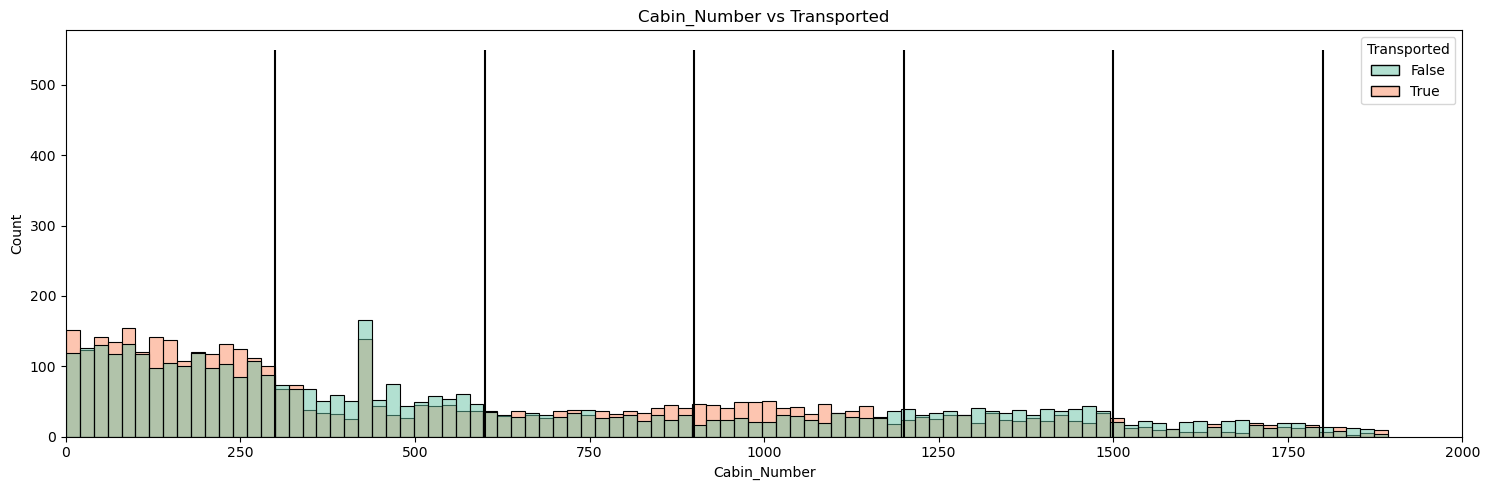

In [50]:
plt.figure(figsize=(15,5))
sns.histplot(x='Cabin_Number', hue='Transported', data=titanic_train,binwidth=20,palette='Set2')
plt.vlines(300,ymin=0,ymax=550,color='black')
plt.vlines(600,ymin=0,ymax=550,color='black')
plt.vlines(900,ymin=0,ymax=550,color='black')
plt.vlines(1200,ymin=0,ymax=550,color='black')
plt.vlines(1500,ymin=0,ymax=550,color='black')
plt.vlines(1800,ymin=0,ymax=550,color='black')
plt.title('Cabin_Number vs Transported')
plt.xlim(0,2000)
plt.tight_layout()
plt.show()

**Insights**
* We can observe that **Cabin_Number** can be divided into different regions with group of **300** passenegrs.
* So we can create a new features **Cabin_Regions** which will indicate passenger cabin number region.

## Creating New Feature "Cabin_Regions" From "Cabin_Number".

In [51]:
def cabin_regions(df):
    df['Cabin_Region1'] = (df['Cabin_Number']<300)
    df['Cabin_Region2'] = ((df['Cabin_Number']>=300) & (df['Cabin_Number']<600))
    df['Cabin_Region3'] = ((df['Cabin_Number']>=600) & (df['Cabin_Number']<900))
    df['Cabin_Region4'] = ((df['Cabin_Number']>=900) & (df['Cabin_Number']<1200))
    df['Cabin_Region5'] = ((df['Cabin_Number']>=1200) & (df['Cabin_Number']<1500))
    df['Cabin_Region6'] = ((df['Cabin_Number']>=1500) & (df['Cabin_Number']<1800))
    df['Cabin_Region7'] = (df['Cabin_Number']>=1800)

In [52]:
cabin_regions(titanic_train)
cabin_regions(titanic_test)

In [53]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Cabin_Region7
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,B,0,P,True,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,F,0,S,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,A,0,S,True,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,A,0,S,True,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,F,1,S,True,False,False,False,False,False,False


### Visualizing "Cabin_Region" Feature.

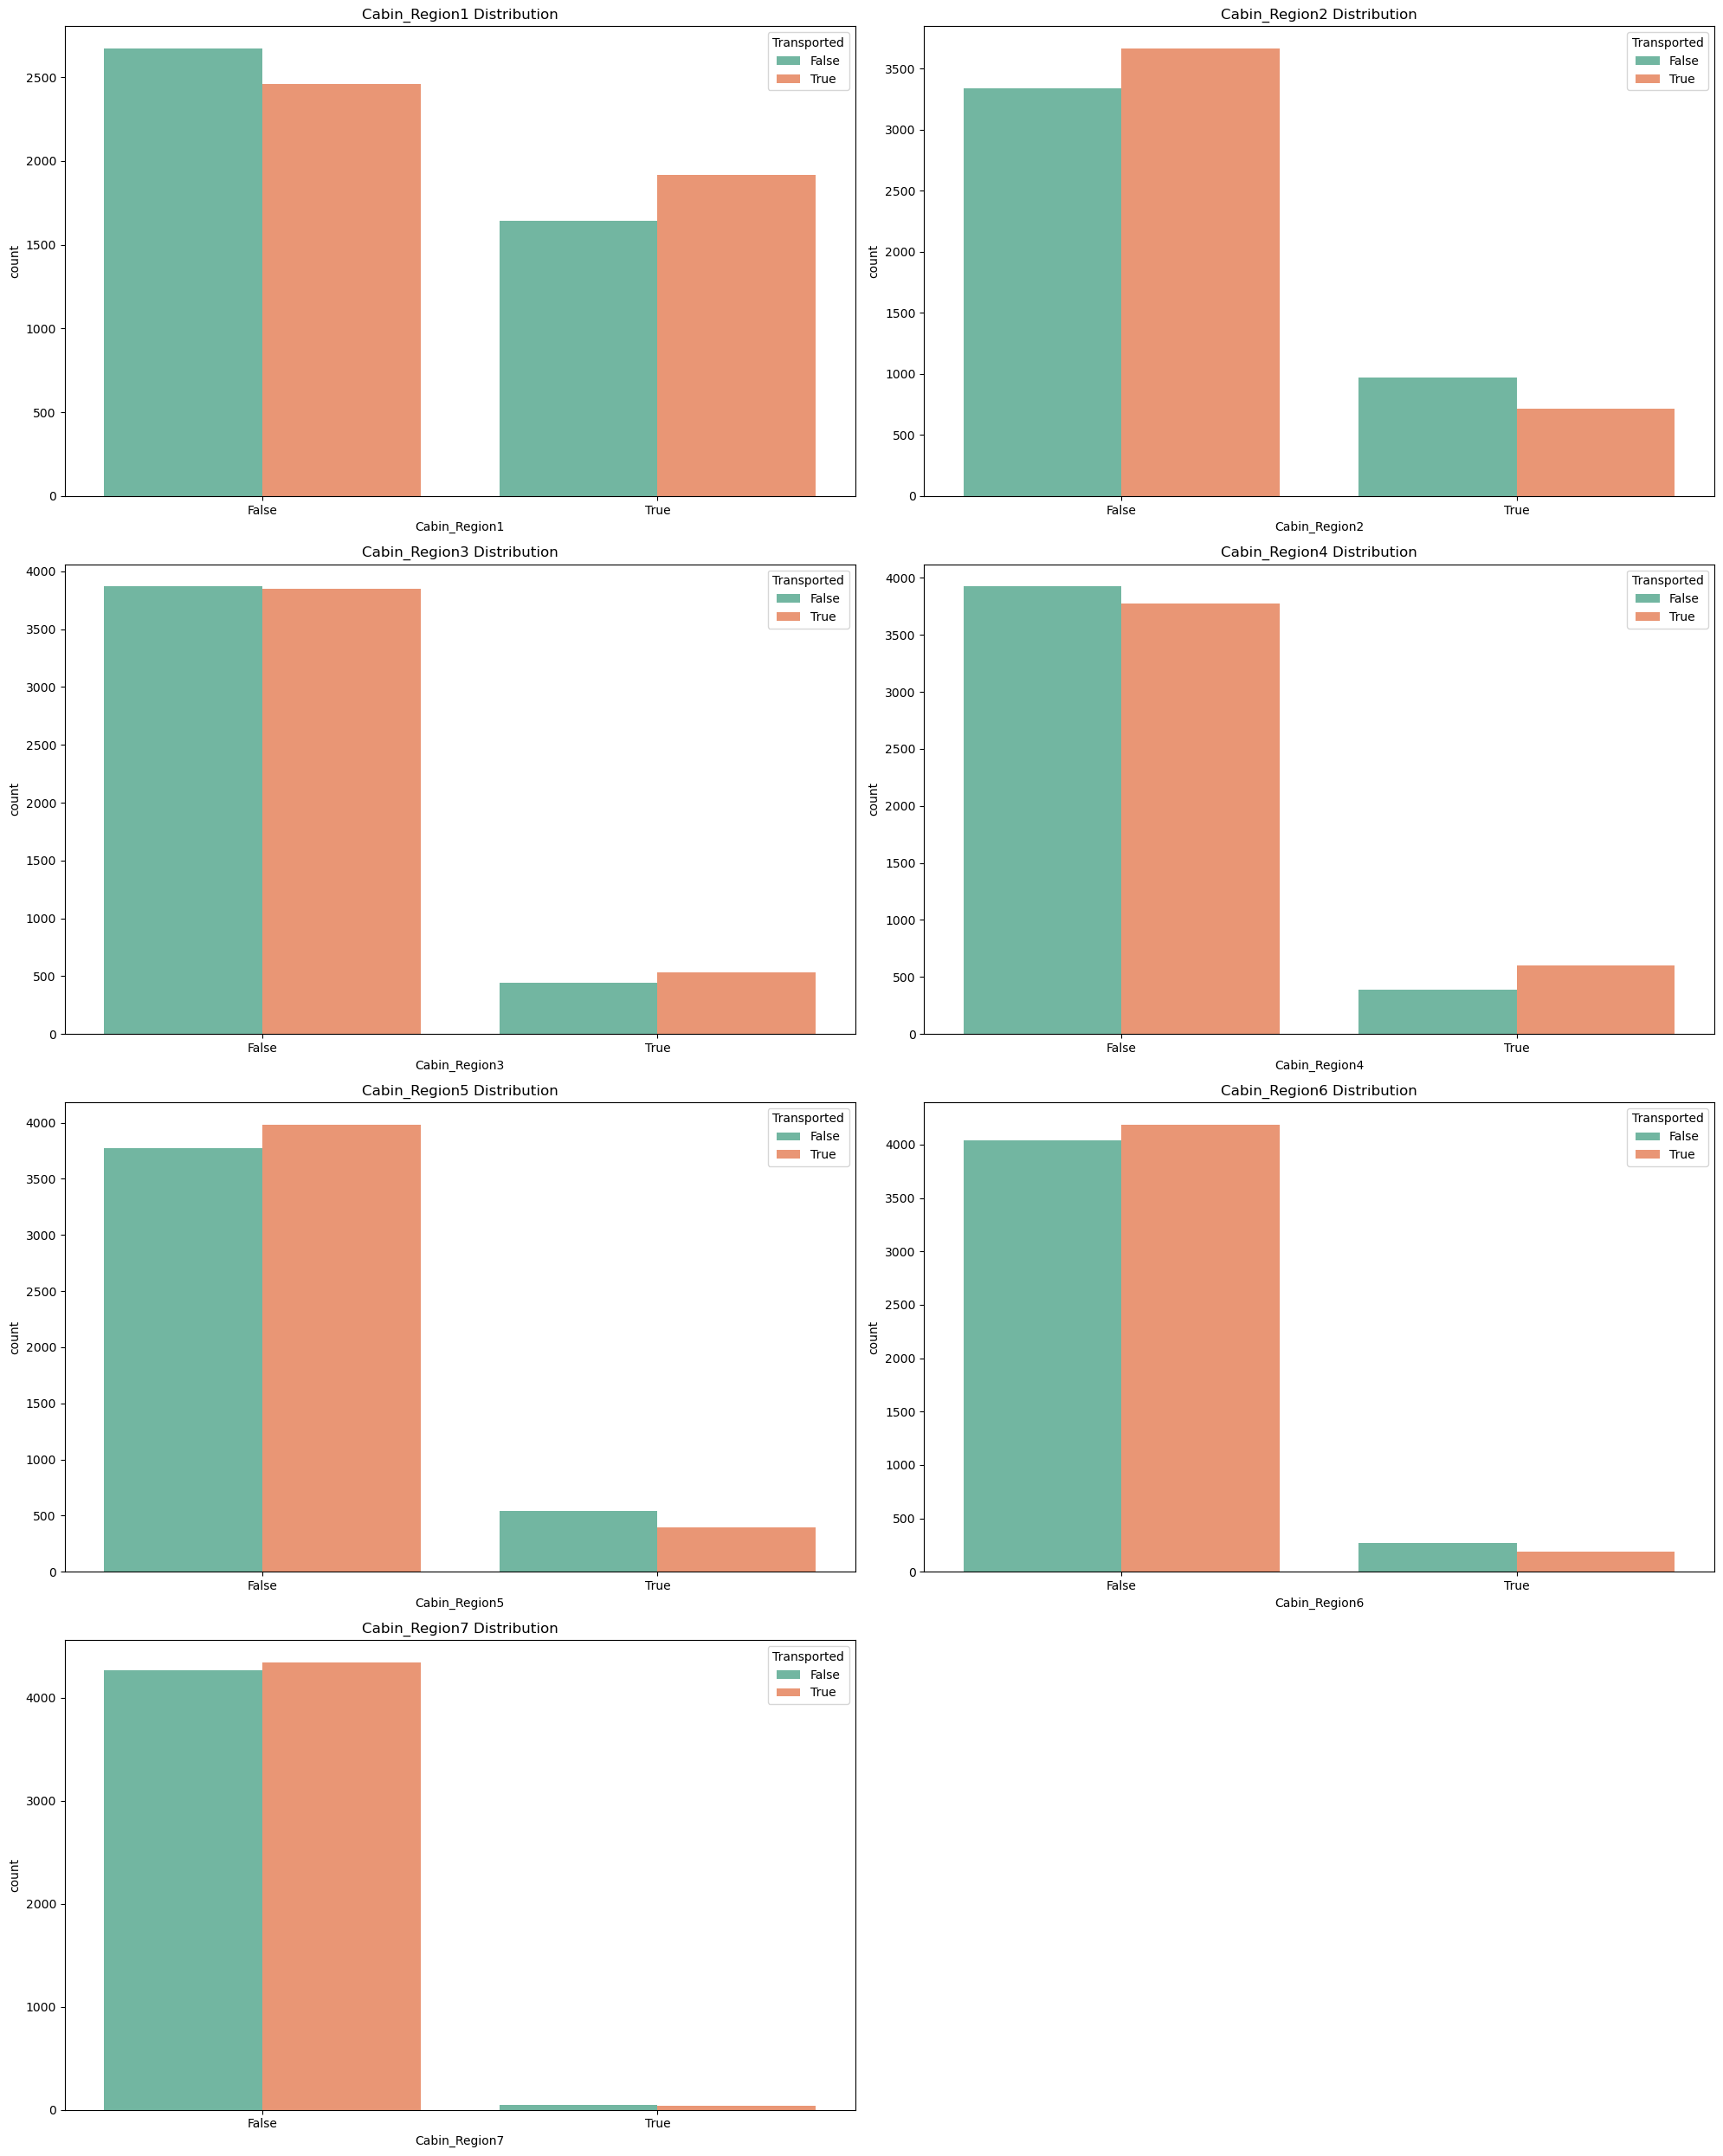

In [54]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Cabin_Region7"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=titanic_train, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

**Observation**
* We can observe that passengers from **Cabin_Region1** are **Highly Transported** when compared with other cabin regions.
* we can also observe that as the cabin region number is increasing passengers transport is decreasing.

## Creating New Feature From "Age"

In [55]:
titanic_train['Age'].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


**How we will do feature engineering on Age Feature**
* As we have done **EDA** on **Age** feature we collected some insights over there that the ages can be splitted into different groups based on **Transported**.
* So we will create a new feature name **Age Group** and will split the **Age** into different groups on the basics of insights we gained from EDA.

In [56]:
def age_group(df):
    age_group = []
    for i in df['Age']:
        if i<=12:
            age_group.append('Age_0-12')
        elif (12<i<=18):
            age_group.append('Age_13-18')
        elif (18<i<=25):
            age_group.append('Age_19-25')
        elif (25<i<=32):
            age_group.append('Age_26-32')
        elif (32<i<=50):
            age_group.append('Age_32-50')
        elif (i>50):
            age_group.append('Age_50+')
        else:
            age_group.append(np.nan)
    df['Age_Group'] = age_group

In [57]:
age_group(titanic_train)
age_group(titanic_test)

### Visualizing "Age Group" Feature.

In [58]:
order=sorted(titanic_train['Age_Group'].value_counts().keys().to_list())
order

['Age_0-12', 'Age_13-18', 'Age_19-25', 'Age_26-32', 'Age_32-50', 'Age_50+']

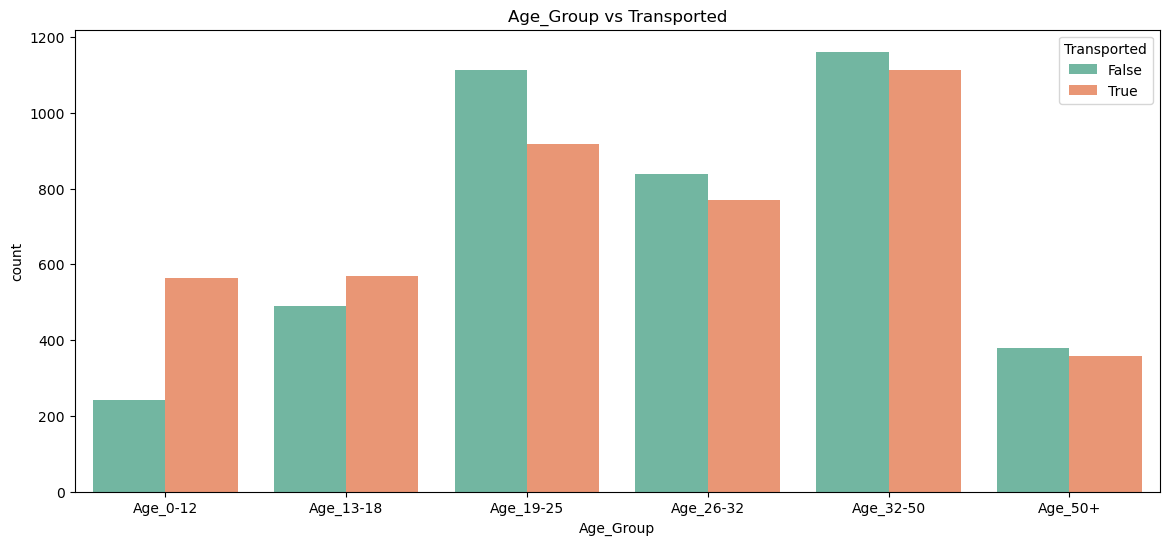

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(x='Age_Group', hue='Transported', data=titanic_train, palette='Set2', order=order)
plt.title('Age_Group vs Transported')
plt.show()

**Insights**
* This new feature looks more relevent to our target data.
* **Age_0-12 & Age_0-18** are more likely to be transported compared to not transported.
* **Age_19-25 , Age_26_32 & Age_33_50** are less likely to be transported compared to not transported.
* **Age_50+** are almost equally transported compared to not transported.

## Creating New Features Using All Expenditude Features.

**How can we do feature engineering on all expenditure featrues**

* When we have done **EDA** on this expenditure features we gained some insights as:-
* 1. We can create a **Total Expenditure** Feature by combining all the expenditures.
* 2. We can create a **No Spending** boolean feature from **Total Expenditure** feature indicating **True** for those passengers who have spent **0** expense.
* 3. We can split **Total Expenditure** into different categories indicating whether the person is having **no_expense, low_expense, medium_expense or high_expense** and can create a new feature **Expenditure Category**.

In [60]:
titanic_train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [61]:
exp_cols=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_feature(df):
    df['Total_Expenditure'] = df[exp_cols].sum(axis=1)
    df['No_Spending'] = (df['Total_Expenditure']==0)
    

In [62]:
new_exp_feature(titanic_train)
new_exp_feature(titanic_test)

In [63]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Cabin_Region7,Age_Group,Total_Expenditure,No_Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,True,False,False,False,False,False,False,Age_32-50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,False,False,False,False,False,False,Age_19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,True,False,False,False,False,False,False,Age_50+,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,True,False,False,False,False,False,False,Age_32-50,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,False,False,False,False,False,False,Age_13-18,1091.0,False


## Visualizing "Total Expenditure" Feature

Text(0.5, 1.0, 'Total Expenditure Distribution')

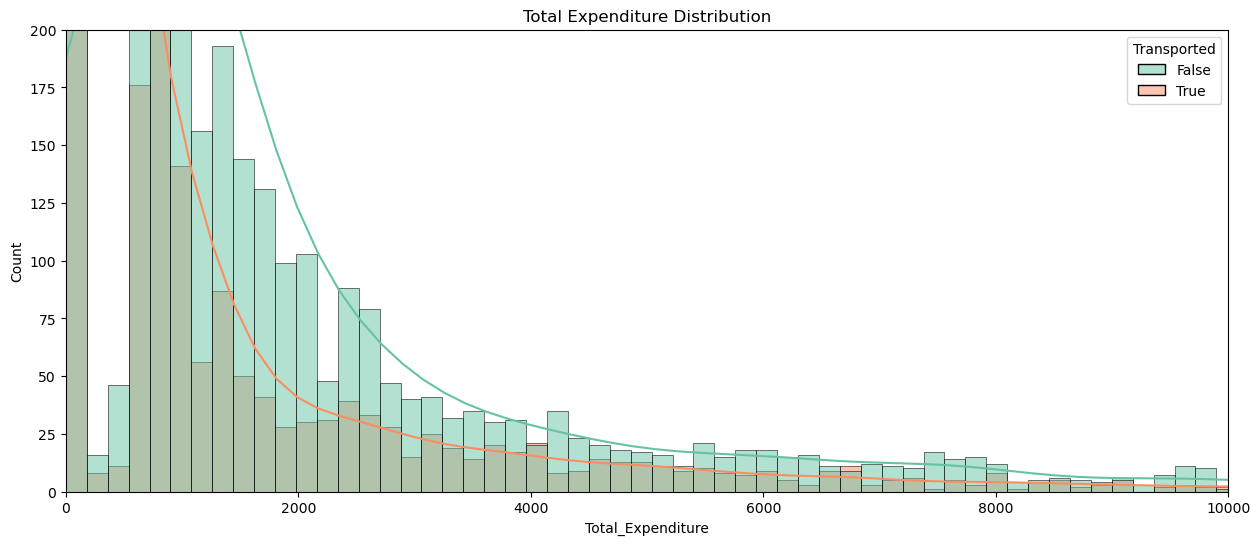

In [64]:
plt.figure(figsize=(15,6))
sns.histplot(x='Total_Expenditure',hue='Transported', data=titanic_train, kde=True, palette='Set2',bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title('Total Expenditure Distribution')

**Generating some statistical information from Total Expenditue feature**

In [65]:
mean=round(titanic_train['Total_Expenditure'].mean())
median=titanic_train['Total_Expenditure'].median()

print('Mean of Total_Expenditure feature is:', mean)
print('Meadin of Tital_Expenditure feature is:', median)

Mean of Total_Expenditure feature is: 1441
Meadin of Tital_Expenditure feature is: 716.0


**Insights**
* Using above measure of central tendency values we can split **Total Expenditure** Features into different expense categories.
* If **Total Expenditure** is equal to **0** then **No Expense** category.
* If **Total Expenditure** is between **1-716** then **Low Expense** category.
* If **Total Expenditure** is between **717-1441** then **Medium Expense** category.
* If **Total Expenditure** is greater thean **1441** then **High Expense** category.

In [66]:
def expenditure_category(df):
    expense_category = []

    for i in df['Total_Expenditure']:
        if i==0:
            expense_category.append('No Expense')
        elif (0<i<=716):
            expense_category.append('Low Expense')
        elif (716<i<=1441):
            expense_category.append('Medium Expense')
        elif (i>1441):
            expense_category.append('High Expense')
    df['Expenditure_Category'] = expense_category

In [67]:
expenditure_category(titanic_train)
expenditure_category(titanic_test)

### Visualizing "No Spending" & "Expenditure Category" Features.

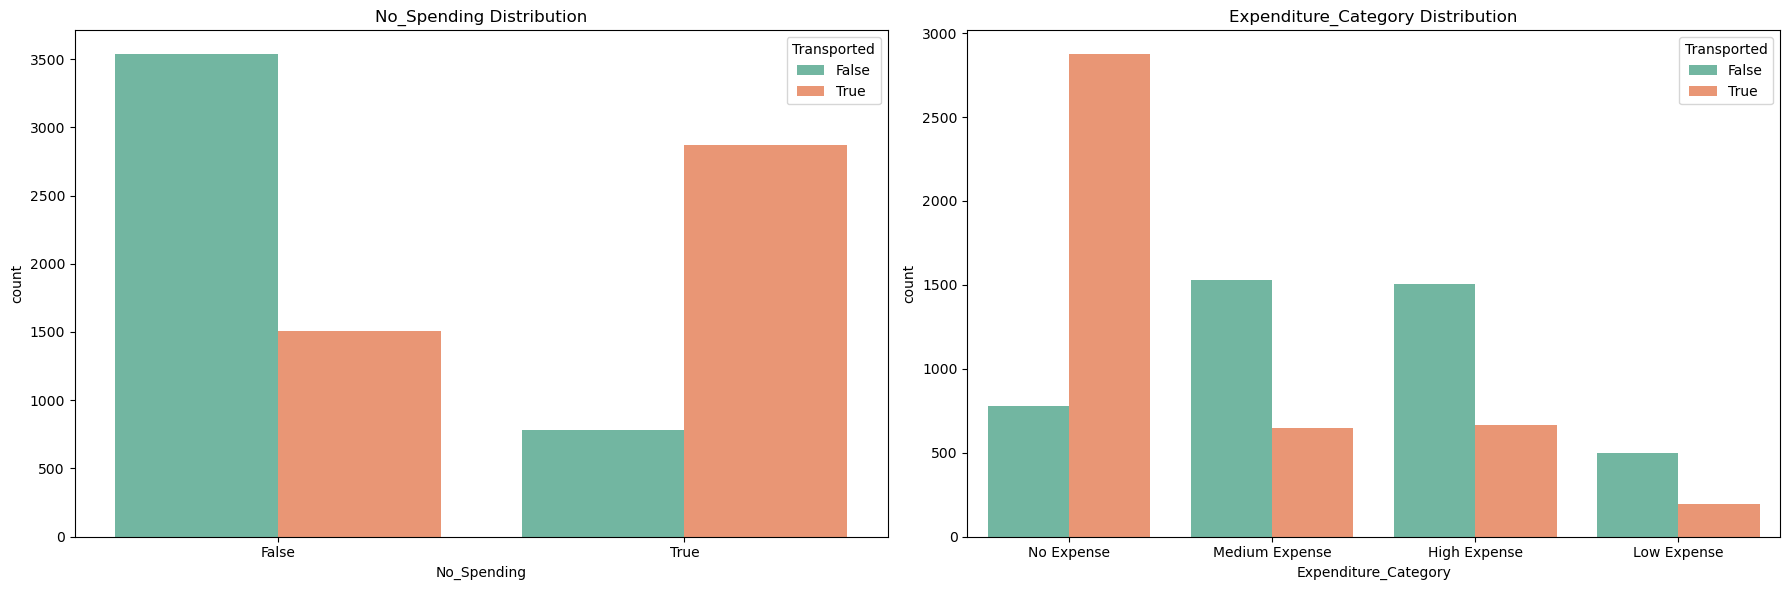

In [68]:
cols = ['No_Spending','Expenditure_Category']

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue='Transported', data=titanic_train, palette='Set2')
    plt.title(f"{column} Distribution")
    plt.tight_layout()

**Observation**

* In **Total Expenditure** feature we can observe that passengers having low total expenses are likely to be transported more.
* In **No Spending** feature we can observe that passenger having **No Spending** are highly transported.
* in **Expenditure Category** feature we can confirm than passenger having **No Expense** are highly transported .

# Data Pre-Processing

In [69]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Cabin_Region7,Age_Group,Total_Expenditure,No_Spending,Expenditure_Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,False,False,False,False,False,Age_32-50,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,False,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,False,False,False,False,False,Age_50+,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,False,False,False,False,False,Age_32-50,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,False,False,False,False,False,False,Age_13-18,1091.0,False,Medium Expense


In [70]:
z=titanic_train.isnull().sum()[titanic_train.isnull().sum()>0].to_frame().rename(columns={0:'No of Missing Values'})
z['% of Missing Values'] = round(titanic_train.isnull().sum()[titanic_train.isnull().sum()>0]*100/len(titanic_train),2)
z

,No of Missing Values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


## Handling Missing values

In [71]:
cat_cols=titanic_train.select_dtypes(include=['object','bool']).columns.to_list()
cat_cols.remove('Transported')
num_cols=titanic_train.select_dtypes(include=['int','float']).columns.to_list()

In [72]:
print('Categorical Columns:',cat_cols)
print('\n','-'*100)
print('\nNumerical columns:',num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Group', 'Member', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Cabin_Region7', 'Age_Group', 'No_Spending', 'Expenditure_Category']

 ----------------------------------------------------------------------------------------------------

Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Cabin_Number', 'Total_Expenditure']


## Using Simple Imputer Library to Fill Missing Values

In [73]:
imputer1 = SimpleImputer(strategy='most_frequent')  ##To fill categorical features
imputer2 = SimpleImputer(strategy='median')  ##To fill numerical features

In [74]:
def fill_missing_no(df):
    df[cat_cols]=imputer1.fit_transform(df[cat_cols])
    df[num_cols]=imputer2.fit_transform(df[num_cols])

In [75]:
fill_missing_no(titanic_train)
fill_missing_no(titanic_test)

In [76]:
print("Missing numbers left in titanic_train is:",titanic_train.isnull().sum().sum())
print("Missing numbers left in titanic_test is:",titanic_test.isnull().sum().sum())

Missing numbers left in titanic_train is: 0
Missing numbers left in titanic_test is: 0


## Checking Duplicacy in Data

In [77]:
print("Duplicate values in training data is: ",titanic_train.duplicated().sum())
print("Duplicate values in testing data is: ",titanic_test.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


## Checking Cardinality of Categorical Features

In [78]:
print('Cardinality of featues in training dataset: ')
print(titanic_train.select_dtypes(include=['object']).nunique())
print('\n','-'*100)
print('Cardinality of features in testing dataset:')
print(titanic_test.select_dtypes(include=['object']).nunique())

Cardinality of featues in training dataset: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Group                   6217
Member                     8
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Cabin_Region7              2
Age_Group                  6
No_Spending                2
Expenditure_Category       4
dtype: int64

 ----------------------------------------------------------------------------------------------------
Cardinality of features in testing dataset:
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP         

In [79]:
##Extracting passengerId from test data because we need this for submitting our predictions on kaggle.
PassengerId_df = titanic_test[["PassengerId"]]

**observation**
* We have done all feature engineering now we can drop features which have high cardinality.
* So we can drop **passengerId**, **Cabin** , **Name** , **Group** features.

In [80]:
cols = ["PassengerId","Cabin","Name","Group"]
titanic_train.drop(columns =cols, inplace=True)
titanic_test.drop(columns=cols, inplace=True)

### Gathering Statistical Information of Numerical Features.

In [81]:
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Cabin_Number,8693.0,596.398942,506.637799,0.0,173.0,427.0,983.0,1894.0
Total_Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


**Obervation**
* We can oberve in **RoomService, FoodCourt, ShoppingMall, Spa & VRDeck** more than 50 percentile of data are equal to **0**.
* And when we did **EDA** on this features all of them were having **right skewed distribution**
* So we can simply say there is a presence of large amount of **outliers** in these features.
* So we can **tranform** these features to normal distribution using **Log Transformation**.
* Since, we are applying log transformation on these **expenditure features** so we have to apply transformation on **Total Expenditure** also.
* So that the model can have better understanding while finding **patterns**.

## Applying Log Transformation on Expenditure Features

In [82]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Expenditure']

for value in cols:
    titanic_train[value] = np.log(1+titanic_train[value])
    titanic_test[value] = np.log(1+titanic_test[value])

### Visualizing these features after Transformation

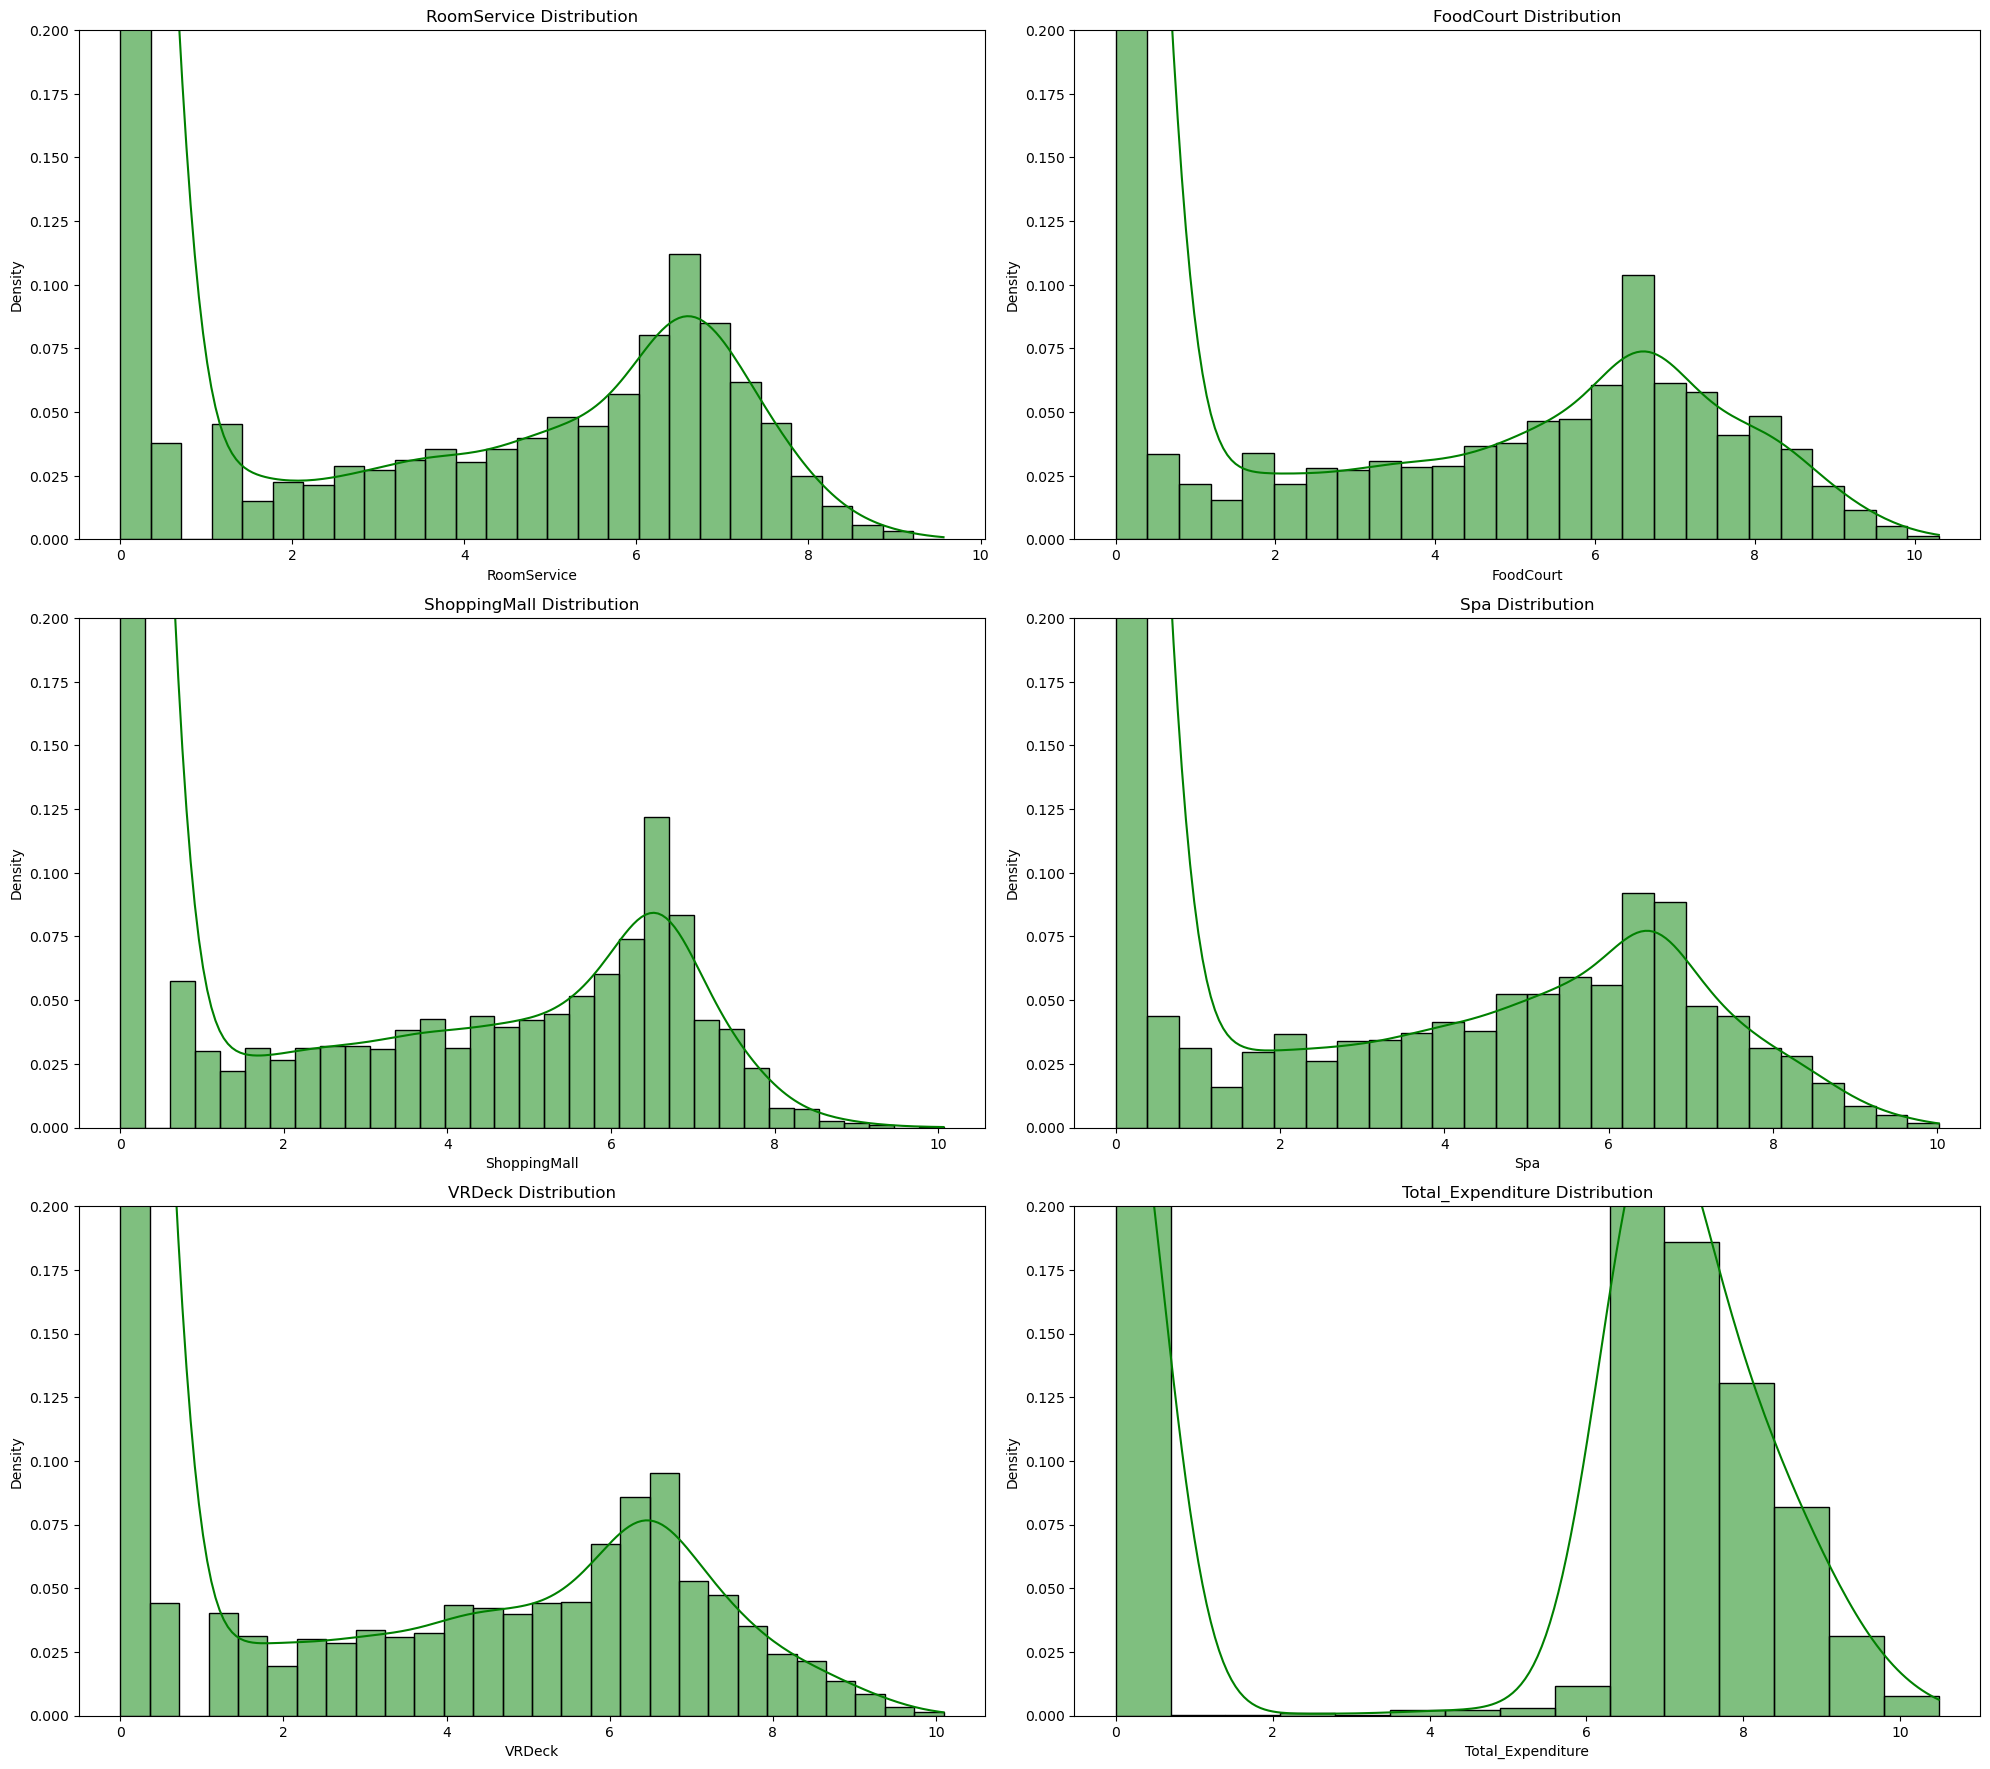

In [83]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.histplot(titanic_train[i],kde=True,stat='density',color='green')
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    x+=1
plt.tight_layout()
plt.show()

## Checking Data Types of Features

In [84]:
titanic_train.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Member                   object
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Number            float64
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Cabin_Region7            object
Age_Group                object
Total_Expenditure       float64
No_Spending              object
Expenditure_Category     object
dtype: object

In [85]:
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Cabin_Region7,Age_Group,Total_Expenditure,No_Spending,Expenditure_Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,Age_32-50,0.000000,True,No Expense
1,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,...,False,False,False,False,False,False,Age_19-25,6.602588,False,Medium Expense
2,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,...,False,False,False,False,False,False,Age_50+,9.248021,False,High Expense
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,...,False,False,False,False,False,False,Age_32-50,8.551981,False,High Expense
4,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,...,False,False,False,False,False,False,Age_13-18,6.995766,False,Medium Expense


**Note**
1. **CryoSleep** , **VIP**, **Travelling_Solo**, **No Spending**, **Cabin_Region1, Cabin_Region2, Cabin_Region3, Cabin_Region4, Cabin_Region5, Cabin_Region6, Cabin_Region7** features contains boolean values so we have to change there data-type which will be benefical while encoding our categorical features.

## Changing Data-Type to Boolean

In [86]:
cols = ["CryoSleep","VIP","Travelling_Solo","No_Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6","Cabin_Region7"]

titanic_train[cols] = titanic_train[cols].astype(bool)
titanic_test[cols] = titanic_test[cols].astype(bool)

In [87]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   bool   
 2   Destination           8693 non-null   object 
 3   Age                   8693 non-null   float64
 4   VIP                   8693 non-null   bool   
 5   RoomService           8693 non-null   float64
 6   FoodCourt             8693 non-null   float64
 7   ShoppingMall          8693 non-null   float64
 8   Spa                   8693 non-null   float64
 9   VRDeck                8693 non-null   float64
 10  Transported           8693 non-null   bool   
 11  Member                8693 non-null   object 
 12  Travelling_Solo       8693 non-null   bool   
 13  Group_Size            8693 non-null   float64
 14  Cabin_Deck            8693 non-null   object 
 15  Cabin_Number         

## Feature Encoding

* We will do **One Hot Encoding** for nominal categorical features.
* We will do **LabelEncoding** for ordinal categorical features.

In [88]:
nominal_cate_cols = ["HomePlanet","Destination"]
ordinal_cate_cols = ["CryoSleep","VIP","Travelling_Solo","Member","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Cabin_Region7","Age_Group","No_Spending",
                    "Expenditure_Category"]

## Label Encoding

In [89]:
enc = LabelEncoder()

In [90]:
titanic_train[ordinal_cate_cols]=titanic_train[ordinal_cate_cols].apply(enc.fit_transform)
titanic_test[ordinal_cate_cols]=titanic_test[ordinal_cate_cols].apply(enc.fit_transform)

## One Hot Encoding

In [91]:
titanic_train=pd.get_dummies(titanic_train,columns=nominal_cate_cols)
titanic_test=pd.get_dummies(titanic_test,columns=nominal_cate_cols)

### After one hot coding we got some more columns of Boolean Data Types (True/False) let's convert into (0 and 1)

In [92]:
# Convert all boolean columns to integers
bool_cols = titanic_train.select_dtypes(include=['bool']).columns
titanic_train[bool_cols] = titanic_train[bool_cols].astype(int)

In [93]:
bool_cols1 = titanic_test.select_dtypes(include=['bool']).columns
titanic_test[bool_cols1] = titanic_test[bool_cols1].astype(int)

## Checking all features are encoded or not

In [94]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int32  
 9   Member                     8693 non-null   int32  
 10  Travelling_Solo            8693 non-null   int64  
 11  Group_Size                 8693 non-null   float64
 12  Cabin_Deck                 8693 non-null   int32  
 13  Cabin_Number               8693 non-null   float

In [95]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Member                     4277 non-null   int32  
 9   Travelling_Solo            4277 non-null   int64  
 10  Group_Size                 4277 non-null   float64
 11  Cabin_Deck                 4277 non-null   int32  
 12  Cabin_Number               4277 non-null   float64
 13  Cabin_Side                 4277 non-null   int32

## Selecting Feature & Labels for Model Training

In [96]:
X=titanic_train.drop(columns=['Transported'])
y=titanic_train['Transported']

## Splitting Data for Model Where We Need Scaled Data

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6954, 31) (6954,)
(1739, 31) (1739,)


### Feature Scaling On This Splitted Data

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Splitting Data for Model Where We Don't Need Scaled Data

In [100]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
print(X_train1.shape,y_train1.shape)
print(X_test1.shape,y_test1.shape)

(6954, 31) (6954,)
(1739, 31) (1739,)


# Model Building For Scaled Data

## 1. Logistic Regression Model

In [102]:
# Training the Model
classifier=LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [103]:
# Prediction for training and test data
y_train_pred_lr=classifier.predict(X_train_scaled)
y_test_pred_lr=classifier.predict(X_test_scaled)

print(y_train_pred_lr)
print(y_test_pred_lr)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 1 0]


In [104]:
# Evaluate the model
# Training Data
train_accuracy_lr = accuracy_score(y_train,y_train_pred_lr)

# Testing Data
test_accuracy_lr = accuracy_score(y_test,y_test_pred_lr)

print(f"Logistic Regression Trainning Accuracy: {train_accuracy_lr}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_lr}")
print("Confusion Matrix: ",confusion_matrix(y_test,y_test_pred_lr))

Logistic Regression Trainning Accuracy: 0.7794075352315214
Logistic Regression Testing Accuracy: 0.7671075330649799
Confusion Matrix:  [[638 223]
 [182 696]]


## 2. K-Nearest Neighbors (KNN) Model.

In [105]:
#Training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
#Prediction for training and testing data
y_train_pred_knn=knn.predict(X_train_scaled)
y_test_pred_knn=knn.predict(X_test_scaled)

In [107]:
#Evaluate the model
# Training data
train_accuracy_knn = accuracy_score(y_train,y_train_pred_knn)

# Testing Data
test_accuracy_knn = accuracy_score(y_test,y_test_pred_knn)

print(f"KNN Trainning Accuracy: {train_accuracy_knn}")
print(f"KNN Testing Accuracy: {test_accuracy_knn}")
print("Confusion Matrix: ",confusion_matrix(y_test,y_test_pred_knn))

KNN Trainning Accuracy: 0.8622375611159045
KNN Testing Accuracy: 0.7475560667050029
Confusion Matrix:  [[665 196]
 [243 635]]


## 3. Support Vector Machine (SVM)

In [108]:
#Training the model
svm=SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [109]:
#Prediction for training and testing data
y_train_pred_svm=svm.predict(X_train_scaled)
y_test_pred_svm=svm.predict(X_test_scaled)

In [110]:
#Evaluate the model
# Training data
train_accuracy_svm = accuracy_score(y_train,y_train_pred_svm)

# Testing Data
test_accuracy_svm = accuracy_score(y_test,y_test_pred_svm)

print(f"SVM Trainning Accuracy: {train_accuracy_svm}")
print(f"SVM Testing Accuracy: {test_accuracy_svm}")
print("Confusion Matrix: ",confusion_matrix(y_test,y_test_pred_svm))

SVM Trainning Accuracy: 0.8169398907103825
SVM Testing Accuracy: 0.7860839562967222
Confusion Matrix:  [[662 199]
 [173 705]]


## 4. Naive Bayes

In [111]:
# Training the model
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [112]:
# Prediction for training and testing data
y_train_pred_gnb=gnb.predict(X_train_scaled)
y_test_pred_gnb=gnb.predict(X_test_scaled)

In [113]:
#Evaluate the model
#Training the data
from sklearn.metrics import classification_report
training_accuracy_gnb=accuracy_score(y_train,y_train_pred_gnb)

#Testing data
testing_accuracy_gnb=accuracy_score(y_test,y_test_pred_gnb)

print('GNB Training Accuracy Score:',training_accuracy_gnb)
print('GNB Testing Accuracy Score:',testing_accuracy_gnb)
print('GNB Classification Report',classification_report(y_test,y_test_pred_gnb))
print('GNB Confusion Matrix:',confusion_matrix(y_test,y_test_pred_gnb))

GNB Training Accuracy Score: 0.7371297095197009
GNB Testing Accuracy Score: 0.7395054629097182
GNB Classification Report               precision    recall  f1-score   support

           0       0.71      0.80      0.75       861
           1       0.78      0.68      0.72       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

GNB Confusion Matrix: [[692 169]
 [284 594]]


# Model Building For Un-Scaled Data

## 1. Decision Tree Classifier

In [114]:
# training the model
dtc=DecisionTreeClassifier(max_depth=3,criterion='entropy')
dtc.fit(X_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [115]:
# Prediction for training and testing data
y_train_pred_dtc=dtc.predict(X_train1)
y_test_pred_dtc=dtc.predict(X_test1)

In [116]:
#Evaluate the model
#Training the data
training_accuracy_dtc=accuracy_score(y_train1,y_train_pred_dtc)

#Testing data
testing_accuracy_dtc=accuracy_score(y_test1,y_test_pred_dtc)

print('Decision Tree Training Accuracy Score:',training_accuracy_dtc)
print('Decision Tree Testing Accuracy Score:',testing_accuracy_dtc)
print('Decision Tree Confusion Matrix:',confusion_matrix(y_test1,y_test_pred_dtc))

Decision Tree Training Accuracy Score: 0.7601380500431406
Decision Tree Testing Accuracy Score: 0.7515813686026452
Decision Tree Confusion Matrix: [[613 248]
 [184 694]]


## 2. Random Forest Classifier

In [117]:
# Training the model
rfc=RandomForestClassifier(n_estimators=100,max_depth=5,criterion='entropy')
rfc.fit(X_train1,y_train1)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [118]:
# Prediction for training and testing data
y_train_pred_rfc=rfc.predict(X_train1)
y_test_pred_rfc=rfc.predict(X_test1)

In [119]:
#Evalaute the model
#Training data
training_accuracy_rfc=accuracy_score(y_train1,y_train_pred_rfc)

#Testing data
testing_accuracy_rfc=accuracy_score(y_test1,y_test_pred_rfc)

print('Random Forest Training Accuracy Score:',training_accuracy_rfc)
print('Random Forest Testing Accuracy Score:',testing_accuracy_rfc)
print('Random Forest Confusion Matrix:',confusion_matrix(y_test1,y_test_pred_rfc))


Random Forest Training Accuracy Score: 0.76775956284153
Random Forest Testing Accuracy Score: 0.7630822311673375
Random Forest Confusion Matrix: [[696 165]
 [247 631]]


## 3. Gradient Boosting Model

In [120]:
#Training the model
gbc = GradientBoostingClassifier()
gbc.fit(X_train1,y_train1)

GradientBoostingClassifier()

In [121]:
# Prediction for training and testing data
y_train_pred_gbc=gbc.predict(X_train1)
y_test_pred_gbc=gbc.predict(X_test1)

In [122]:
#Evalaute the model
#Training data
training_accuracy_gbc=accuracy_score(y_train1,y_train_pred_gbc)

#Testing data
testing_accuracy_gbc=accuracy_score(y_test1,y_test_pred_gbc)

print('Gradient Boosting Training Accuracy Score:',training_accuracy_gbc)
print('Gradient Boosting Testing Accuracy Score:',testing_accuracy_gbc)
print('Gradient Boosting Confusion Matrix:',confusion_matrix(y_test1,y_test_pred_gbc))


Gradient Boosting Training Accuracy Score: 0.8245614035087719
Gradient Boosting Testing Accuracy Score: 0.7912593444508338
Gradient Boosting Confusion Matrix: [[643 218]
 [145 733]]


## 4. Light Gradient Boosting Machine (LGBM) Model

In [123]:
# Training the model
lgbm=LGBMClassifier(verbose=-1)  # Suppresses all warnings and info logs
lgbm.fit(X_train1,y_train1)

LGBMClassifier(verbose=-1)

In [124]:
# Prediction for training and testing data
y_train_pred_lgbm=lgbm.predict(X_train1)
y_test_pred_lgbm=lgbm.predict(X_test1)

In [125]:
#Evalaute the model
#Training data
training_accuracy_lgbm=accuracy_score(y_train1,y_train_pred_lgbm)

#Testing data
testing_accuracy_lgbm=accuracy_score(y_test1,y_test_pred_lgbm)

print('Light Gradient Boosting Training Accuracy Score:',training_accuracy_lgbm)
print('Light Gradient Boosting Testing Accuracy Score:',testing_accuracy_lgbm)
print('Light Gradient Boosting Confusion Matrix:',confusion_matrix(y_test1,y_test_pred_lgbm))
print("Classification Report:",classification_report(y_test1, y_test_pred_lgbm))

Light Gradient Boosting Training Accuracy Score: 0.8937302272073626
Light Gradient Boosting Testing Accuracy Score: 0.8085106382978723
Light Gradient Boosting Confusion Matrix: [[687 174]
 [159 719]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.80       861
           1       0.81      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



## 5. XGBoost Model

In [126]:
# Training the model
xgb=XGBClassifier()
xgb.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [127]:
# Prediction for training and testing data
y_train_pred_xgb=xgb.predict(X_train1)
y_test_pred_xgb=xgb.predict(X_test1)

In [128]:
#Evalaute the model
#Training data
training_accuracy_xgb=accuracy_score(y_train1,y_train_pred_xgb)

#Testing data
testing_accuracy_xgb=accuracy_score(y_test1,y_test_pred_xgb)

print('XG Boosting Training Accuracy Score:',training_accuracy_xgb)
print('XG Boosting Testing Accuracy Score:',testing_accuracy_xgb)
print('XG Boosting Confusion Matrix:',confusion_matrix(y_test1,y_test_pred_xgb))
print("Classification Report:",classification_report(y_test1, y_test_pred_xgb))

XG Boosting Training Accuracy Score: 0.9456427955133736
XG Boosting Testing Accuracy Score: 0.8027602070155262
XG Boosting Confusion Matrix: [[694 167]
 [176 702]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.81      0.80       861
           1       0.81      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## 6. Cat Boost

In [129]:
# Initialize the CatBoost Classifier
cat = CatBoostClassifier(verbose=0)  # verbose=0 suppresses the training output

# Train the model
cat.fit(X_train1, y_train1)

# Predictions for training and testing data
y_train_pred_cat = cat.predict(X_train1)
y_test_pred_cat = cat.predict(X_test1)

# Evaluate accuracy
training_accuracy_cat = accuracy_score(y_train1, y_train_pred_cat)
testing_accuracy_cat = accuracy_score(y_test1, y_test_pred_cat)

print("CatBoost Training Accuracy:", training_accuracy_cat)
print("CatBoost Testing Accuracy:", testing_accuracy_cat)

# Classification report for testing data
print("\nClassification Report:")
print(classification_report(y_test1, y_test_pred_cat))


CatBoost Training Accuracy: 0.8852459016393442
CatBoost Testing Accuracy: 0.8090856814261069

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       861
           1       0.80      0.82      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



# All Model Performance Comparison

In [130]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest",
          "Gradient Boost","LightGBM","XGBoost","CatBoost"]

# Create a dictionary to store the training and testing accuracies
model_accuracies = {
    "Logistic Regression": {"Train Accuracy": train_accuracy_lr, "Test Accuracy": test_accuracy_lr},
    "K-Nearest Neighbors": {"Train Accuracy": train_accuracy_knn, "Test Accuracy": test_accuracy_knn},
    "Support Vector Machine": {"Train Accuracy": train_accuracy_svm, "Test Accuracy": test_accuracy_svm},
    "Naive Bayes": {"Train Accuracy": training_accuracy_gnb, "Test Accuracy": testing_accuracy_gnb},
    "Decision Tree": {"Train Accuracy": training_accuracy_dtc, "Test Accuracy": testing_accuracy_dtc},
    "Random Forest": {"Train Accuracy": training_accuracy_rfc, "Test Accuracy": testing_accuracy_rfc},
    "Gradient Boosting": {"Train Accuracy": training_accuracy_gbc, "Test Accuracy": testing_accuracy_gbc},
    "LightGBM": {"Train Accuracy": training_accuracy_lgbm, "Test Accuracy": testing_accuracy_lgbm},
    "XGBoost": {"Train Accuracy": training_accuracy_xgb, "Test Accuracy": testing_accuracy_xgb},
    "CatBoost": {"Train Accuracy": training_accuracy_cat, "Test Accuracy": testing_accuracy_cat},
}

# Convert to a DataFrame for better visualization
accuracy_df = pd.DataFrame(model_accuracies).T
print("Model Comparison Table:")
print(accuracy_df)


Model Comparison Table:
                        Train Accuracy  Test Accuracy
Logistic Regression           0.779408       0.767108
K-Nearest Neighbors           0.862238       0.747556
Support Vector Machine        0.816940       0.786084
Naive Bayes                   0.737130       0.739505
Decision Tree                 0.760138       0.751581
Random Forest                 0.767760       0.763082
Gradient Boosting             0.824561       0.791259
LightGBM                      0.893730       0.808511
XGBoost                       0.945643       0.802760
CatBoost                      0.885246       0.809086


In [131]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":accuracy_df['Train Accuracy'],
                   "Testing Score":accuracy_df['Test Accuracy']})

In [132]:
df

,Algorithms,Training Score,Testing Score
Logistic Regression,Logistic Regression,0.779408,0.767108
K-Nearest Neighbors,KNN,0.862238,0.747556
Support Vector Machine,SVM,0.816940,0.786084
Naive Bayes,Naive Bayes,0.737130,0.739505
Decision Tree,Decision Tree,0.760138,0.751581
Random Forest,Random Forest,0.767760,0.763082
Gradient Boosting,Gradient Boost,0.824561,0.791259
LightGBM,LightGBM,0.893730,0.808511
XGBoost,XGBoost,0.945643,0.802760
CatBoost,CatBoost,0.885246,0.809086


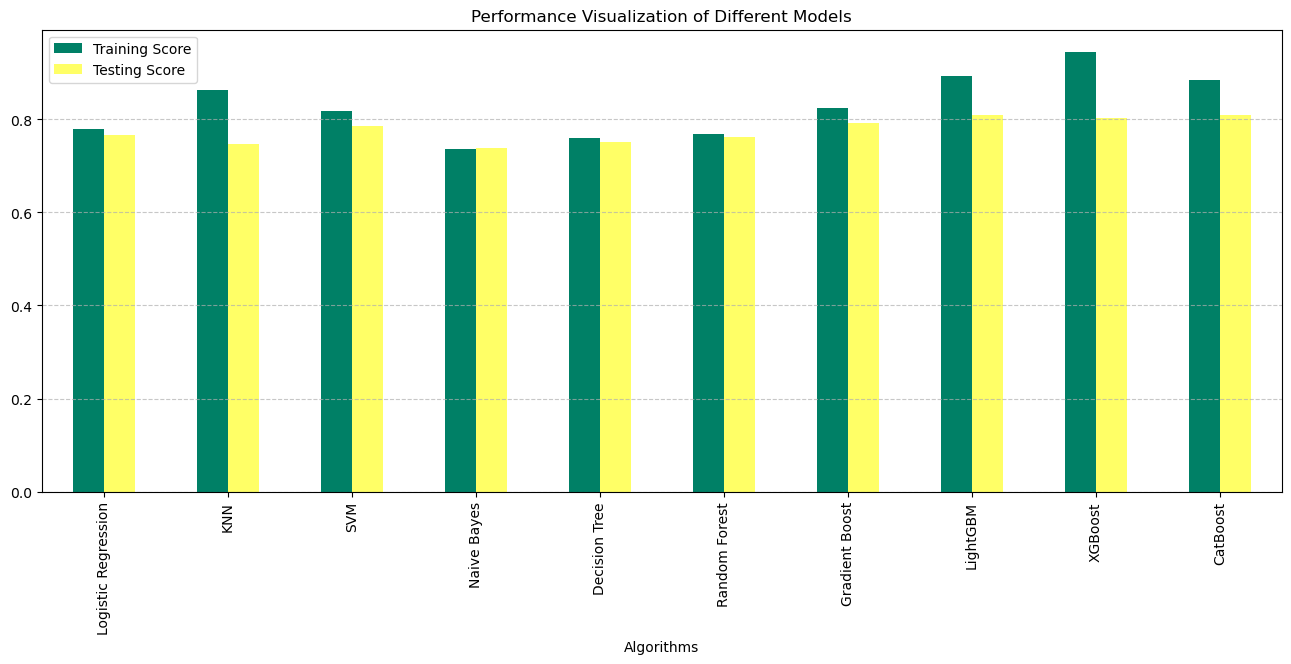

In [133]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="summer")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observation**
* Highest performance was give by **Cat Boost** near to 80.9%.
* But **LGBM**, **Gradient Boost** & **XgBoost**  Model performance was also good.
* So we will do **Hyper-Parameter Tunning** on these four Models.

# Hyper-Parameter Tunning

## 1. Hyper-Parameter Tunning on Cat Boost Model

In [134]:
catboost_model=CatBoostClassifier(verbose=0)

In [135]:
# Define the hyperparameters grid
param_grid_catboost= {'iterations':[50,100],
                 'learning_rate':[0.01,0.05,0.1,0.3,0.5],
                 'depth':[3,5,7,9],
                 'l2_leaf_reg':[1,3,5],
                }

In [136]:
#Perform Grid Search
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5,scoring='accuracy')
grid_search_catboost.fit(X_train1,y_train1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002A7B1B7DE50>,
             param_grid={'depth': [3, 5, 7, 9], 'iterations': [50, 100],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]},
             scoring='accuracy')

In [137]:
# Best parameters and score
print(f"Best parameters for CatBoost: {grid_search_catboost.best_params_}")
print(f"Best score for CatBoost: {grid_search_catboost.best_score_}")

Best parameters for CatBoost: {'depth': 5, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.3}
Best score for CatBoost: 0.8123393449151534


In [138]:
#Extract Best estimator
best_catboost_model = grid_search_catboost.best_estimator_

# Prediction on Train and Test Data
y_train_pred_cat1=best_catboost_model.predict(X_train1)
y_test_pred_cat1=best_catboost_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_cat=accuracy_score(y_train1,y_train_pred_cat1)
test_accuracy_cat=accuracy_score(y_test1,y_test_pred_cat1)

print(f"Train Accuracy for CatBoost: {train_accuracy_cat}")
print(f"Test Accuracy for CatBoost: {test_accuracy_cat}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_cat1))

Train Accuracy for CatBoost: 0.8448375035950532
Test Accuracy for CatBoost: 0.8021851638872916
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       861
           1       0.79      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## 2. Hyper-Parameter Tunning on Gradient Boosting

In [139]:
gb_model=GradientBoostingClassifier()

In [140]:
# Define hyperparameters grid
# Define the hyperparameters grid
param_grid_gb = {
    'n_estimators': [50, 100,150],
    'learning_rate': [0.01, 0.1,0.3,0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5,scoring='accuracy')
grid_search_gb.fit(X_train1, y_train1)

# Best parameters and score
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best score for Gradient Boosting: {grid_search_gb.best_score_}")

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best score for Gradient Boosting: 0.8085998893193137


In [141]:
#Extract Best estimator
best_gb_model = grid_search_gb.best_estimator_

# Prediction on Train and Test Data
y_train_pred_gb=best_gb_model.predict(X_train1)
y_test_pred_gb=best_gb_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_gb=accuracy_score(y_train1,y_train_pred_gb)
test_accuracy_gb=accuracy_score(y_test1,y_test_pred_gb)

print(f"Train Accuracy for Gradient Boosting: {train_accuracy_gb}")
print(f"Test Accuracy for Gradient Boosting: {test_accuracy_gb}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_gb))

Train Accuracy for Gradient Boosting: 0.8462755248777681
Test Accuracy for Gradient Boosting: 0.8039102932719954
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       861
           1       0.79      0.83      0.81       878

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



## 3. Hyper-Parameter Tunning on LightGBM

In [142]:
lgbm_model=LGBMClassifier(verbose=-1)   # Suppresses all warnings and info logs

In [143]:
# Define the hyperparameters grid
param_grid_lgbm = {
    'n_estimators': [100,150, 200,300,500,600],
    'learning_rate': [0.01,0.05, 0.1, 0.3,0.5],
    'num_leaves': [15,20,25],
    'max_depth': [3, 5, 7],
}

# Perform Grid Search
grid_search_lgbm = GridSearchCV(lgbm_model,param_grid_lgbm, cv=5,verbose=0,scoring='accuracy')
grid_search_lgbm.fit(X_train1, y_train1)

# Best parameters and score
print(f"Best parameters for LightGBM: {grid_search_lgbm.best_params_}")
print(f"Best score for LightGBM: {grid_search_lgbm.best_score_}")

Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 15}
Best score for LightGBM: 0.8132011026692665


C:\Users\abcsi\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [144]:
#Extract Best estimator
best_lgbm_model = grid_search_lgbm.best_estimator_

# Prediction on Train and Test Data
y_train_pred_lgbm1=best_lgbm_model.predict(X_train1)
y_test_pred_lgbm1=best_lgbm_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_lgbm=accuracy_score(y_train1,y_train_pred_lgbm1)
test_accuracy_lgbm=accuracy_score(y_test1,y_test_pred_lgbm1)

print(f"Train Accuracy for LightGBM: {train_accuracy_lgbm}")
print(f"Test Accuracy for LightGBM: {test_accuracy_lgbm}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_lgbm1))

Train Accuracy for LightGBM: 0.8533218291630716
Test Accuracy for LightGBM: 0.8067855089131685
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       861
           1       0.80      0.83      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



## 4. Hyper-Parameter Tunning on XGBoost

In [145]:
xgb_model = XGBClassifier()

In [146]:
# Define the hyperparameters grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.3,0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform Grid Search
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5,scoring='accuracy')
grid_search_xgb.fit(X_train1, y_train1)

# Best parameters and score
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best score for XGBoost: 0.8109002891145028


In [147]:
#Extract Best estimator
best_xgb_model = grid_search_xgb.best_estimator_

# Prediction on Train and Test Data
y_train_pred_xgb1=best_xgb_model.predict(X_train1)
y_test_pred_xgb1=best_xgb_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_xgb=accuracy_score(y_train1,y_train_pred_xgb1)
test_accuracy_xgb=accuracy_score(y_test1,y_test_pred_xgb1)

print(f"Train Accuracy for XGBoost: {train_accuracy_xgb}")
print(f"Test Accuracy for XGBoost: {test_accuracy_xgb}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_xgb1))

Train Accuracy for XGBoost: 0.8737417313776243
Test Accuracy for XGBoost: 0.8056354226566993
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       861
           1       0.80      0.81      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



## 5. Hyper-Parameter Tunning on Support Vector Classifier (SVC)

In [148]:
svc_model = SVC()

In [149]:
# Define the hyperparameters grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")
print(f"Best score for SVC: {grid_search_svc.best_score_}")

Best parameters for SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.7926386999674164


In [150]:
#Extract Best estimator
best_svc_model = grid_search_svc.best_estimator_

# Prediction on Train and Test Data
y_train_pred_svc1=best_svc_model.predict(X_train_scaled)
y_test_pred_svc1=best_svc_model.predict(X_test_scaled)

# Evaluate Accuracy
train_accuracy_svc=accuracy_score(y_train,y_train_pred_svc1)
test_accuracy_svc=accuracy_score(y_test,y_test_pred_svc1)

print(f"Train Accuracy for Support Vector Classifier: {train_accuracy_svc}")
print(f"Test Accuracy for Support Vector Classifier: {test_accuracy_svc}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_svc1))

Train Accuracy for Support Vector Classifier: 0.8169398907103825
Test Accuracy for Support Vector Classifier: 0.7860839562967222
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       861
           1       0.78      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



## 6. Hyper-Parameter Tunning on Random Forest

In [151]:
rfc_model = RandomForestClassifier()

In [152]:
# Define the hyperparameters grid
param_grid_rfc = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train1, y_train1)

# Best parameters and score
print(f"Best parameters for Random Forest: {grid_search_rfc.best_params_}")
print(f"Best score for Random Forest: {grid_search_rfc.best_score_}")

Best parameters for Random Forest: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Best score for Random Forest: 0.8042865491934276


In [153]:
#Extract Best estimator
best_rfc_model = grid_search_rfc.best_estimator_

# Prediction on Train and Test Data
y_train_pred_rfc1=best_rfc_model.predict(X_train1)
y_test_pred_rfc1=best_rfc_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_rfc=accuracy_score(y_train1,y_train_pred_rfc1)
test_accuracy_rfc=accuracy_score(y_test1,y_test_pred_rfc1)

print(f"Train Accuracy for Random Forest: {train_accuracy_rfc}")
print(f"Test Accuracy for Random Forest: {test_accuracy_rfc}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_rfc1))

Train Accuracy for Random Forest: 0.8477135461604832
Test Accuracy for Random Forest: 0.7906843013225991
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       861
           1       0.78      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



# Stacking Classifier Model

In [173]:
from sklearn.pipeline import Pipeline
# Stacking Classifier
stacking_model = StackingClassifier(estimators=[
    ('CatBoost', best_catboost_model),
    ('Lightgbm', best_lgbm_model),
    ('XGBoost', best_xgb_model),
    ('GradientBoost',best_gb_model)
],final_estimator=GradientBoostingClassifier())

stacking_model.fit(X_train1, y_train1)


StackingClassifier(estimators=[('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x000002A7BD3B2AB0>),
                               ('Lightgbm',
                                LGBMClassifier(max_depth=7, num_leaves=15,
                                               verbose=-1)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enabl...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('GradientBoost',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=50))],
                   final_estimator=GradientBoostingClassifier())

In [174]:
# Prediction on Train and Test data
y_train_pred_stack=stacking_model.predict(X_train1)
y_test_pred_stack=stacking_model.predict(X_test1)

# Evaluate Accuracy
train_accuracy_stack=accuracy_score(y_train1,y_train_pred_stack)*100
test_accuracy_stack=accuracy_score(y_test1,y_test_pred_stack)*100

print(f"Train Accuracy for Stacking Model: {train_accuracy_stack}")
print(f"Test Accuracy for Stacking Model: {test_accuracy_stack}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test1, y_test_pred_stack))

Train Accuracy for Stacking Model: 85.9217716422203
Test Accuracy for Stacking Model: 80.79355951696378
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       861
           1       0.79      0.84      0.82       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



**Observation**
* We can observe that our **Stacking Model** is having kind of **Best Fitting**
* **Stacking Model** is not having any kind of **over_fitting** or **under_fitting**
* So, we can use this **Stacking Model** to predict our **test_data** and then submit it on kaggle.

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Perform cross-validation
cross_val_scores = cross_val_score(stacking_model, X_train1, y_train1, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cross_val_scores}")
print(f"Average cross-validation accuracy: {cross_val_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracy: {cross_val_scores.std():.4f}")


# Classification report (precision, recall, F1-score)
print("\nClassification Report for Training Data:")
print(classification_report(y_train1, y_train_pred_stack))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test1, y_test_pred_stack))

# Calculate AUC score for test data
roc_auc = roc_auc_score(y_test1, stacking_model.predict_proba(X_test1)[:, 1])  # Predict probabilities for AUC
print(f"\nAUC Score: {roc_auc:.4f}")


Cross-validation accuracy scores: [0.79654925 0.81452193 0.81452193 0.80301941 0.80503597]
Average cross-validation accuracy: 0.8067
Standard deviation of cross-validation accuracy: 0.0070

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.88      0.84      0.85      3454
           1       0.84      0.88      0.86      3500

    accuracy                           0.86      6954
   macro avg       0.86      0.86      0.86      6954
weighted avg       0.86      0.86      0.86      6954


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       861
           1       0.79      0.84      0.82       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


AUC Score: 0.8986


# Predicting Test Data

In [176]:
# Make predictions using the Stacking model
y_test_prediction = stacking_model.predict(titanic_test)

In [177]:
y_test_prediction

array([1, 0, 1, ..., 1, 1, 1])

# Submission Data Format

In [178]:
PassengerId_df.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [179]:
PassengerId_df['Transported']=y_test_prediction
PassengerId_df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [180]:
PassengerId_df['Transported'] = PassengerId_df['Transported'].map({1: True, 0: False})

In [181]:
PassengerId_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [182]:
PassengerId_df.to_csv('Titanic_Submission_.csv', index=False)